In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
# displaying the total rows
pd.set_option('display.max_columns', None)

#**Bsic checks**

In [ ]:
# getting the top 5 rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
# getting the bottom 5 rows
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
65448,51589,-0.248790,1.080973,-0.917017,-0.976831,3.234594,2.963384,0.673578,0.509785,-0.674202,-0.778828,0.348890,-0.743570,-0.265784,-1.497000,0.982542,0.676325,0.448773,0.852961,0.177488,0.172792,-0.160001,-0.482385,-0.326914,0.885378,0.220774,0.300600,-0.277872,-0.146796,0.76,0.0
65449,51589,1.130476,0.090195,0.358313,0.579876,-0.413699,-0.873547,0.192253,-0.105390,-0.005114,-0.117394,0.219510,0.108653,-0.750485,0.615284,1.251465,-0.127890,0.111707,-1.350507,-0.388250,-0.113271,-0.438925,-1.421174,0.310895,0.353704,-0.083121,-0.015829,-0.046818,0.021914,42.90,0.0
65450,51590,1.298511,0.103767,0.026676,0.239810,0.066831,-0.021495,-0.125705,0.066416,-0.000780,0.130748,0.288647,0.202517,-0.449875,0.542012,0.513771,0.880929,-1.047265,0.442188,0.616167,-0.100681,-0.292495,-0.919318,-0.009714,-0.866837,0.313025,0.152421,-0.040222,-0.004856,1.98,0.0
65451,51591,-1.062891,0.242080,2.425183,1.125829,-1.284732,1.535764,-0.524604,1.074866,0.627453,-1.034628,0.153055,1.406010,-0.233288,-0.657781,-2.302404,-0.581819,0.518262,0.070173,0.241809,-0.006922,0.194731,0.719323,0.072734,0.042001,0.060638,-0.254387,0.012123,0.010512,113.65,0.0
65452,51591,1.251499,0.352835,-0.173985,1.057454,0.345146,-0.366959,0.446715,-0.292922,-0.083856,-0.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# getting the basic information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65453 entries, 0 to 65452
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    65453 non-null  int64  
 1   V1      65453 non-null  float64
 2   V2      65453 non-null  float64
 3   V3      65453 non-null  float64
 4   V4      65453 non-null  float64
 5   V5      65453 non-null  float64
 6   V6      65453 non-null  float64
 7   V7      65453 non-null  float64
 8   V8      65453 non-null  float64
 9   V9      65453 non-null  float64
 10  V10     65453 non-null  float64
 11  V11     65452 non-null  float64
 12  V12     65452 non-null  float64
 13  V13     65452 non-null  float64
 14  V14     65452 non-null  float64
 15  V15     65452 non-null  float64
 16  V16     65452 non-null  float64
 17  V17     65452 non-null  float64
 18  V18     65452 non-null  float64
 19  V19     65452 non-null  float64
 20  V20     65452 non-null  float64
 21  V21     65452 non-null  float64
 22

#**Insights**:
###### The dataset contains 85,259 rows and 31 columns, indicating a large number of transactions with multiple features.
###### All columns are numerical: float64 for 30 features and int64 for 1 (Time).
###### Columns V1 to V28 appear to be the result of Principal Component Analysis (PCA)
###### This simplifies preprocessing as no categorical encoding is initially required

In [ ]:
# getting the statastical information of the data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,65453.000000,65453.000000,65453.000000,65453.000000,65453.000000,65453.000000,65453.000000,65453.000000,65453.000000,65453.000000,65453.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000,65452.000000
mean,33429.846867,-0.240575,-0.012987,0.684068,0.171729,-0.266835,0.103221,-0.113163,0.059434,0.037196,-0.042085,0.313860,-0.210217,0.090686,0.114054,0.148114,-0.011451,0.089972,-0.094033,-0.022582,0.048140,-0.028511,-0.106841,-0.039098,0.005598,0.136732,0.019958,0.002181,0.004243,96.276149,0.002582
std,14078.168886,1.857128,1.649806,1.426716,1.378742,1.388857,1.306443,1.254939,1.223332,1.170955,1.101914,1.095567,1.244419,1.086175,1.053801,0.940610,0.928145,1.033855,0.864102,0.817059,0.750537,0.729616,0.637402,0.603012,0.596708,0.439030,0.497424,0.381480,0.322063,270.242777,0.050749
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,-18.271168,-4.049895,-17.769143,-5.791881,-19.214325,-4.152532,-13.563273,-25.162799,-9.498746,-7.213527,-15.806476,-34.830382,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-8.567638,-9.617915,0.000000,0.000000
25%,27748.000000,-1.000865,-0.585921,0.197913,-0.723647,-0.884703,-0.636487,-0.602981,-0.142531,-0.662885,-0.514527,-0.482006,-0.681598,-0.632444,-0.319617,-0.408265,-0.492703,-0.379264,-0.569576,-0.516783,-0.166735,-0.226897,-0.526780,-0.179573,-0.326243,-0.127572,-0.329428,-0.062871,-0.005887,7.680000,0.000000
50%,36941.000000,-0.243460,0.075028,0.774169,0.189237,-0.298678,-0.148843,-0.073032,0.065169,-0.057666,-0.100871,0.256564,0.041844,0.050255,0.107872,0.257120,0.058778,0.032369,-0.082061,-0.028240,-0.023033,-0.062061,-0.081680,-0.051837,0.061257,0.174456,-0.076200,0.009404,0.022739,26.220000,0.000000
75%,43906.000000,1.153819,0.730504,1.408066,1.054661,0.272863,0.495135,0.422151,0.342671,0.695866,0.430769,1.117163,0.583542,0.790972,0.568426,0.825679,0.545749,0.502855,0.397682,0.484965,0.172508,0.114460,0.308386,0.078933,0.402812,0.423146,0.296759,0.082485,0.076182,88.122500,0.000000
max,51591.000000,1.960497,18.183626,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,13.198226,12.018913,7.848392,4.465413,10.526766,5.784514,6.098529,9.253526,5.041069,5.228342,39.420904,22.614889,10.503090,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,19656.530000,1.000000


**Observation**:
#### **Class**:
###### The mean of Class is 0.002393, indicating a highly imbalanced dataset.
####### This means only ~0.24% of the transactions are fraudulent — a typical scenario in fraud detection problems, requiring careful handling (e.g., SMOTE, undersampling, anomaly detection)
#### **Time**:
###### Time ranges from 0 to 60,684 seconds, representing the time elapsed from the first transaction.
###### The median (50%) is 41,180, and the mean is 38,698, indicating transactions are spread somewhat evenly over time.
###### Might be helpful for time-based fraud analysis (e.g., are more frauds happening during certain times?)
#### **Amount**:
###### Transaction Amount ranges from ₹0 to ₹19,656.53, with:
###### Mean: ₹98.37
###### Median: ₹26.99
###### 75% percentile: ₹89.90
###### Indicates most transactions are low to moderate in value, with some outliers.
######Feature scaling might be beneficial due to high variance (std = 268.38).

#**EDA**

**univariate analysis**

<Axes: xlabel='Amount', ylabel='Count'>

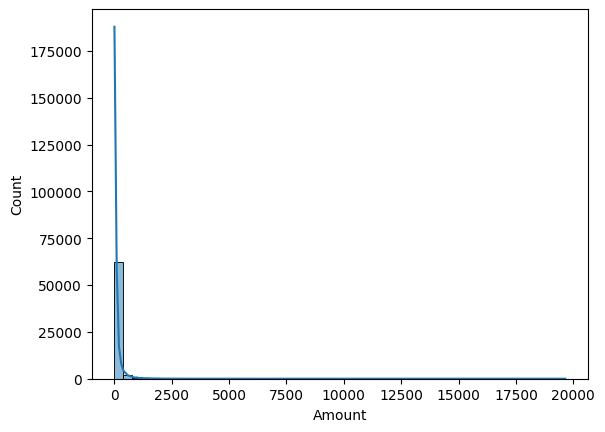

In [ ]:
sns.histplot(df['Amount'],bins = 50,kde = True)

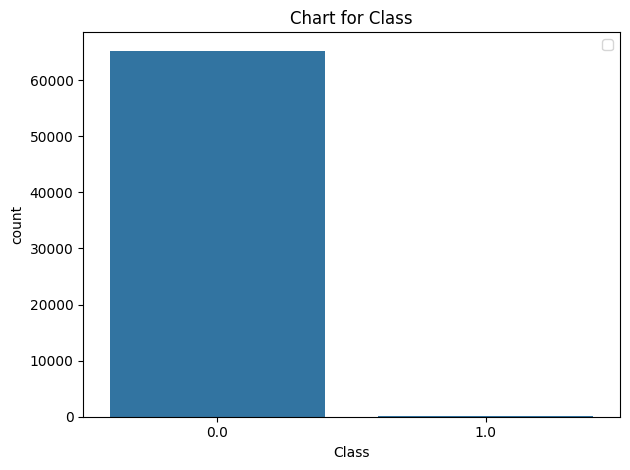

In [ ]:
sns.countplot(x=df['Class'], data=df)
plt.title(f"Chart for Class")

plt.legend()
plt.tight_layout()
plt.show()

<Axes: xlabel='Time', ylabel='Count'>

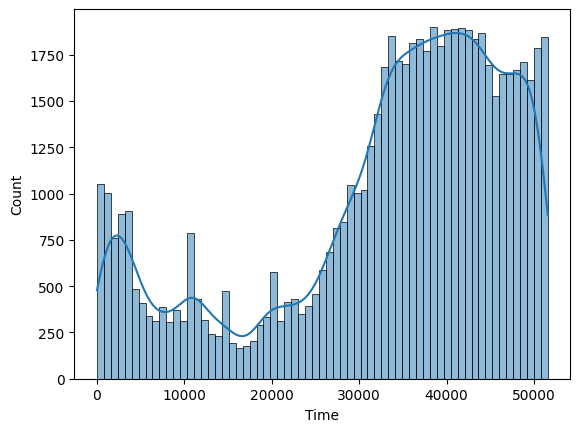

In [ ]:
sns.histplot(df['Time'], kde=True)

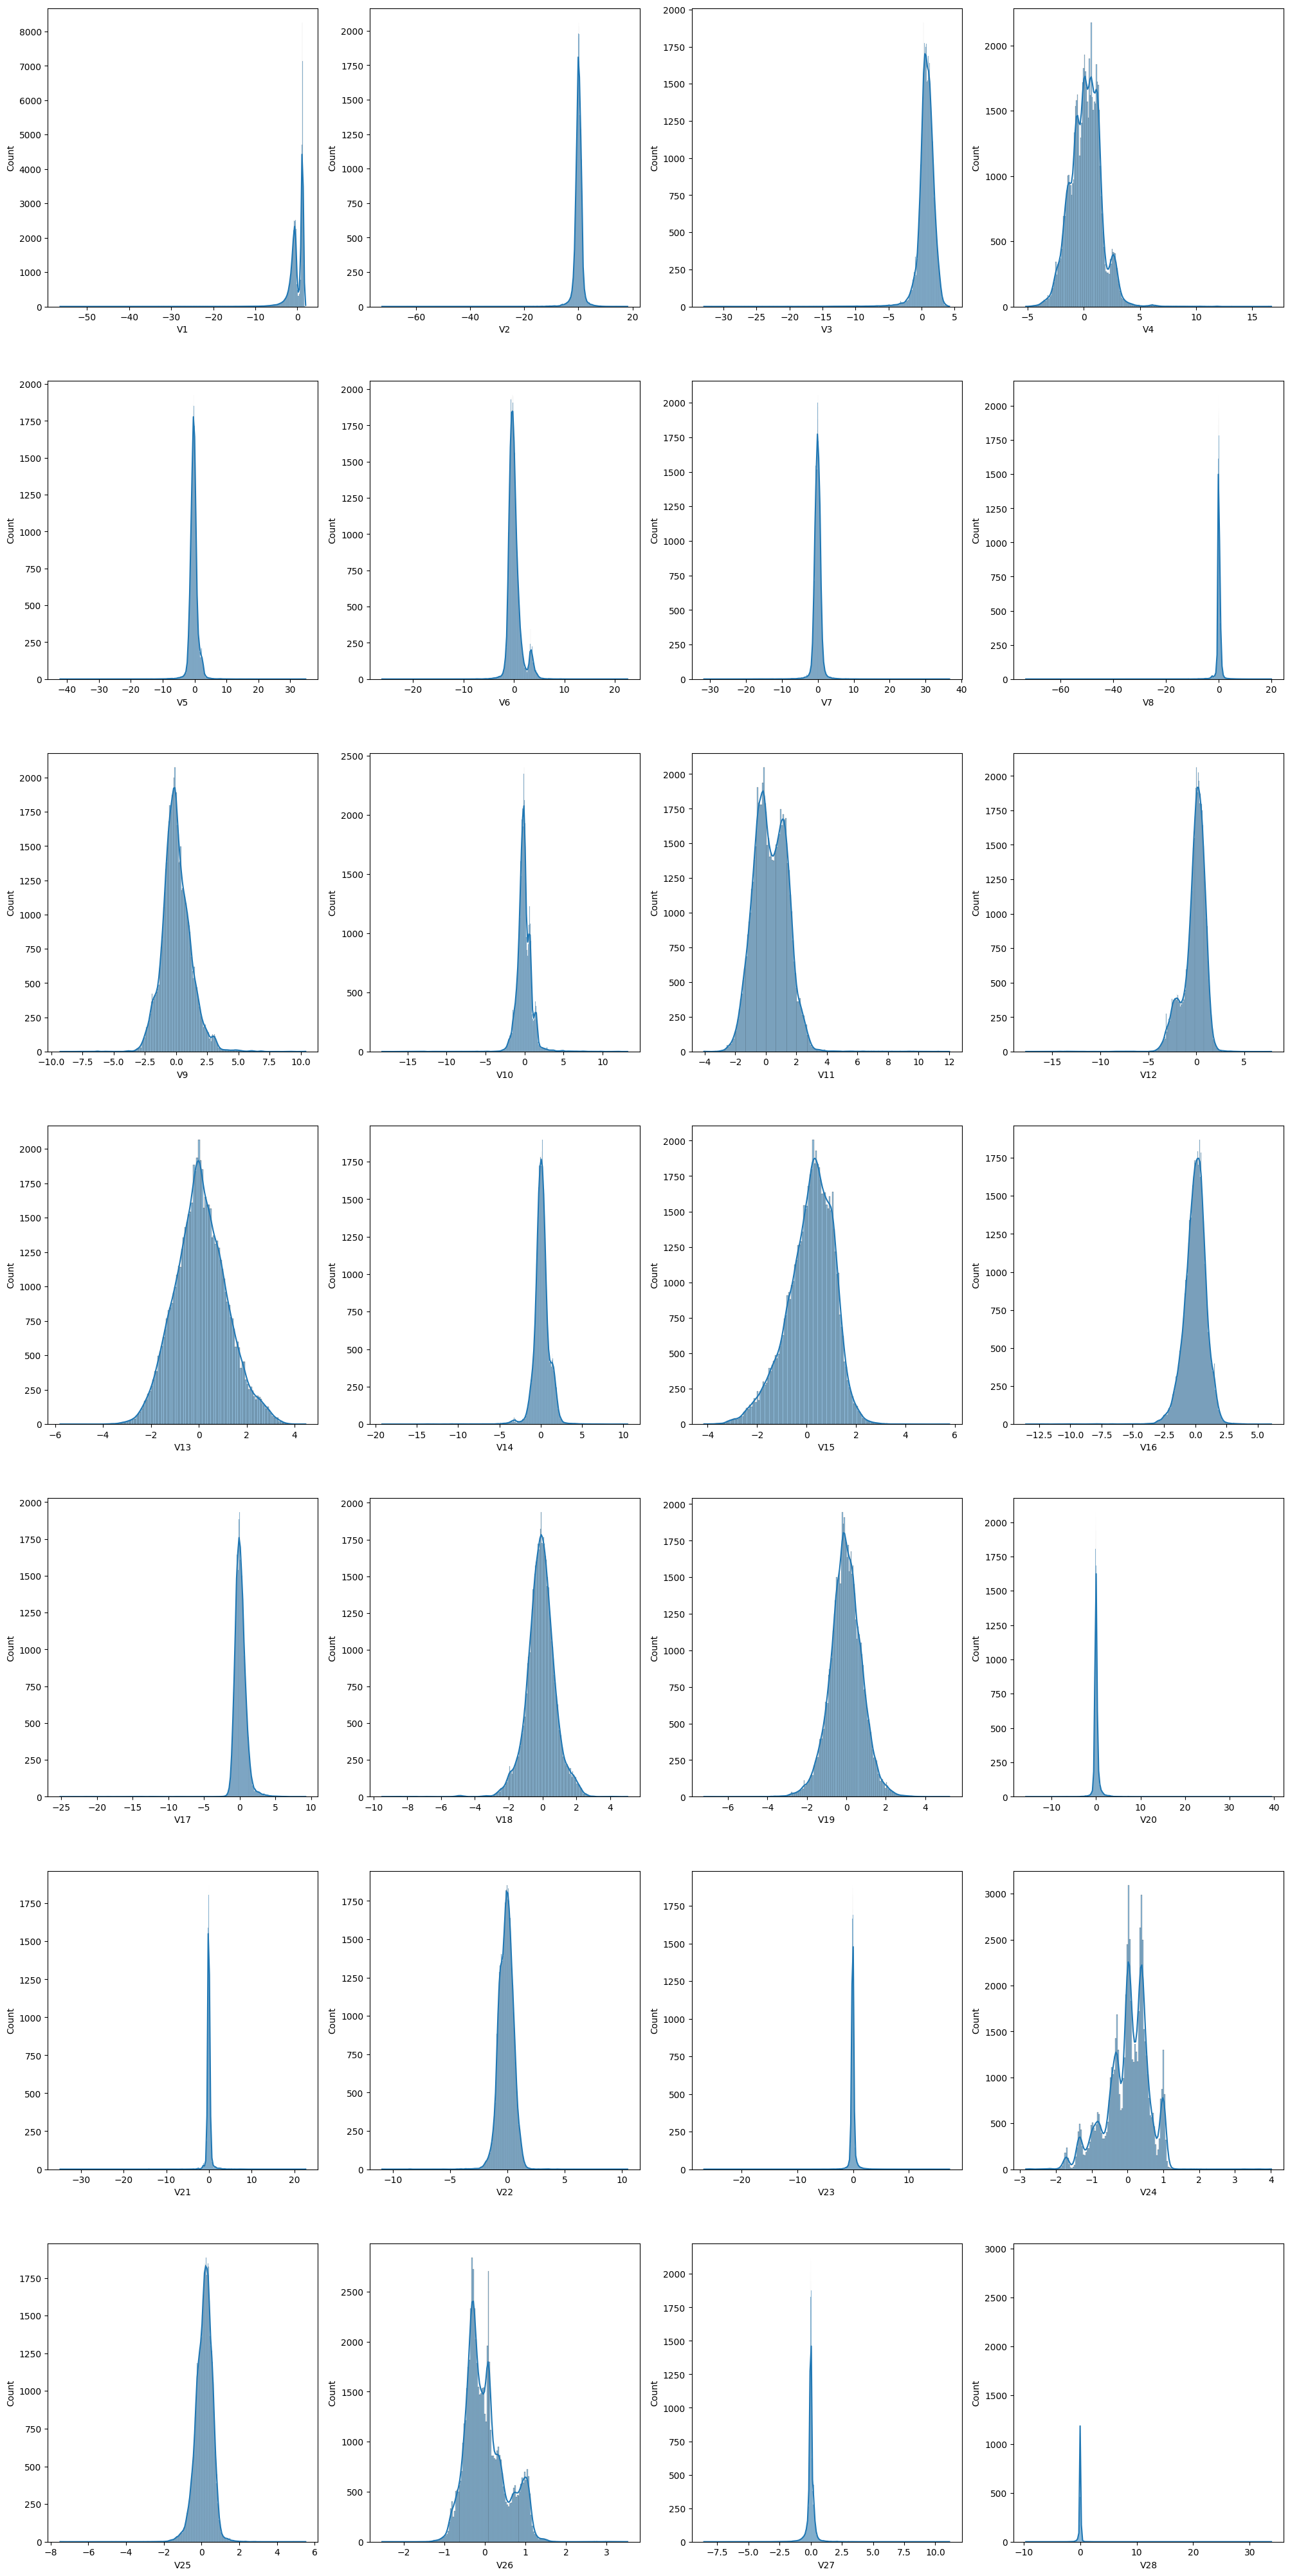

In [ ]:
df_temp = df.drop(columns=['Time','Amount','Class'], axis =1)

#create dist plots
fig, ax = plt.subplots(ncols= 4,nrows= 7, figsize = (20,40))
index = 0
ax =ax.flatten()
for col in df_temp.columns:
    sns.histplot(df_temp[col],ax=ax[index],kde=True)
    index += 1

plt.tight_layout(pad=0.5,w_pad=0.5, h_pad=5)
plt.show()

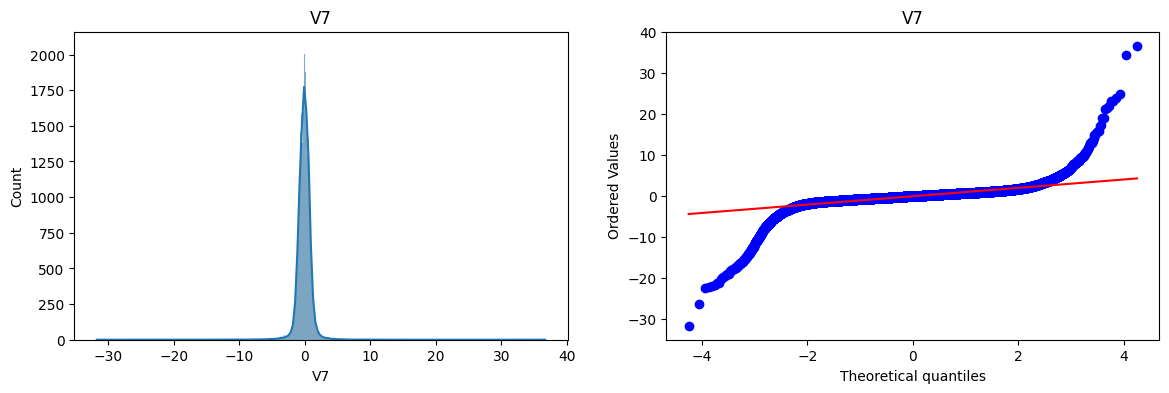

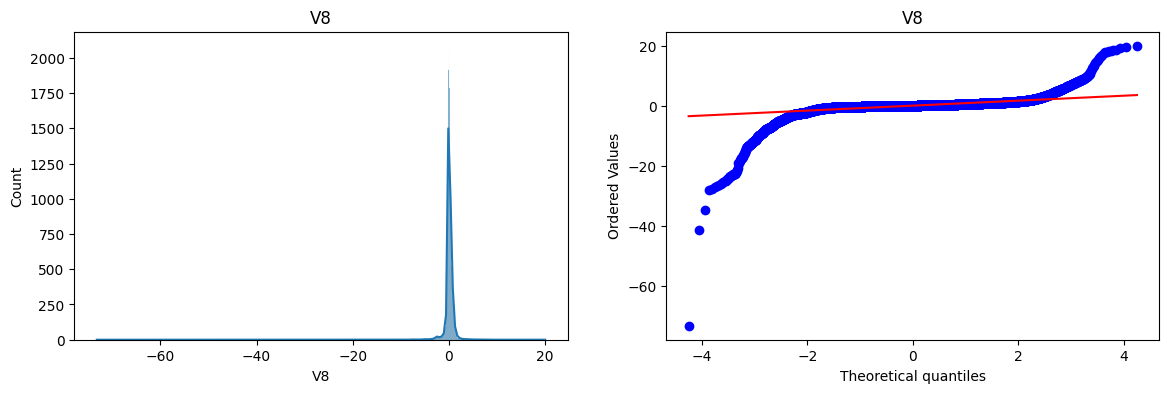

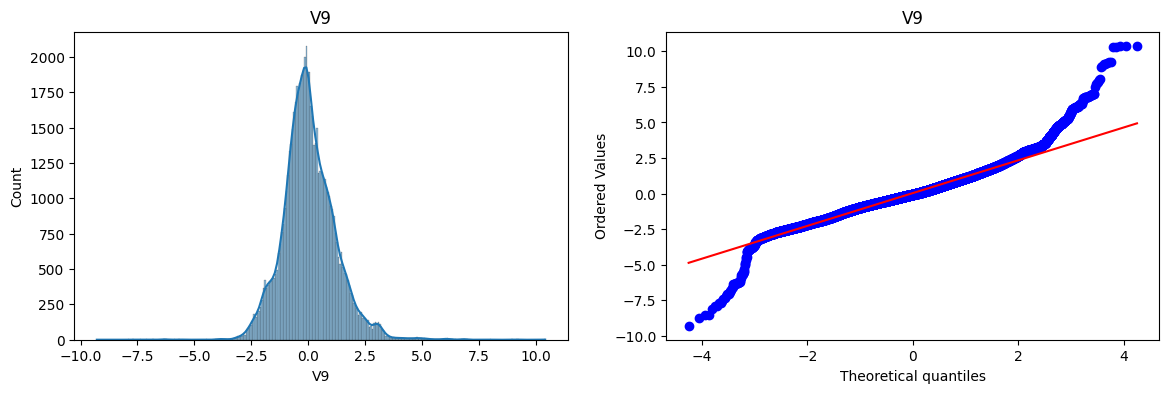

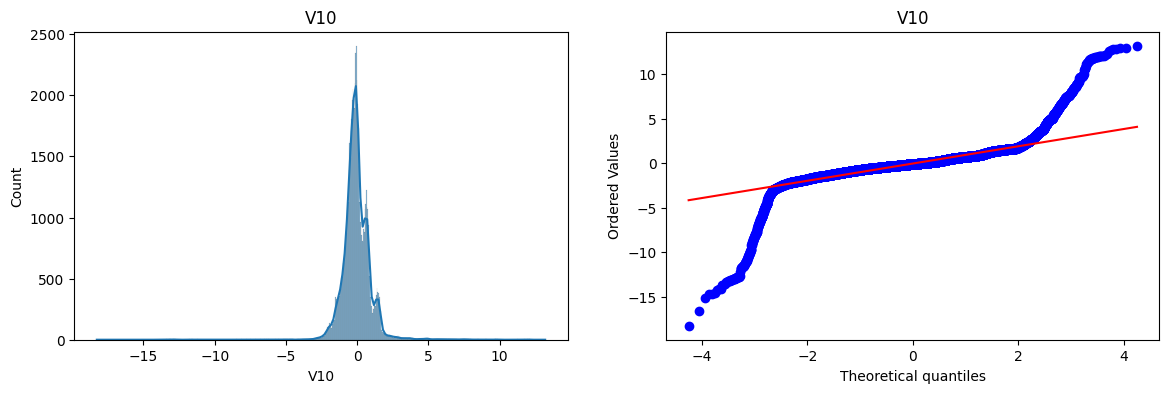

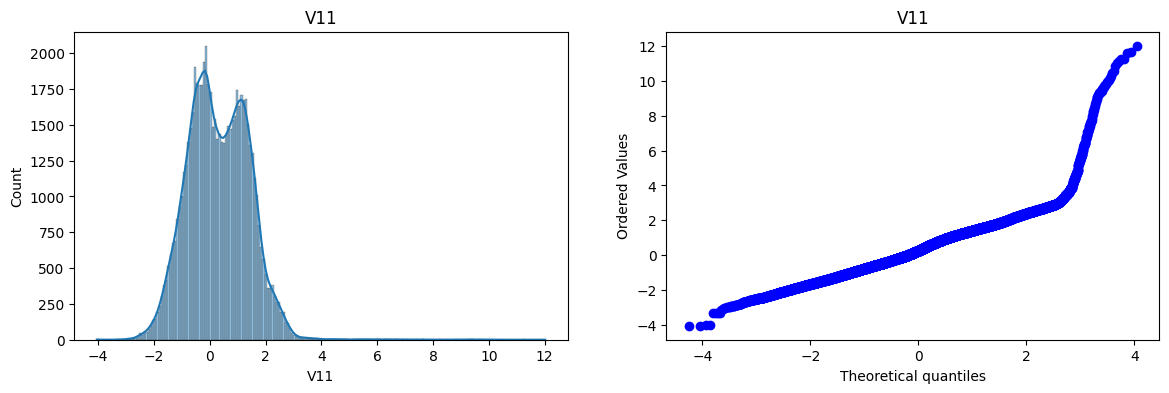

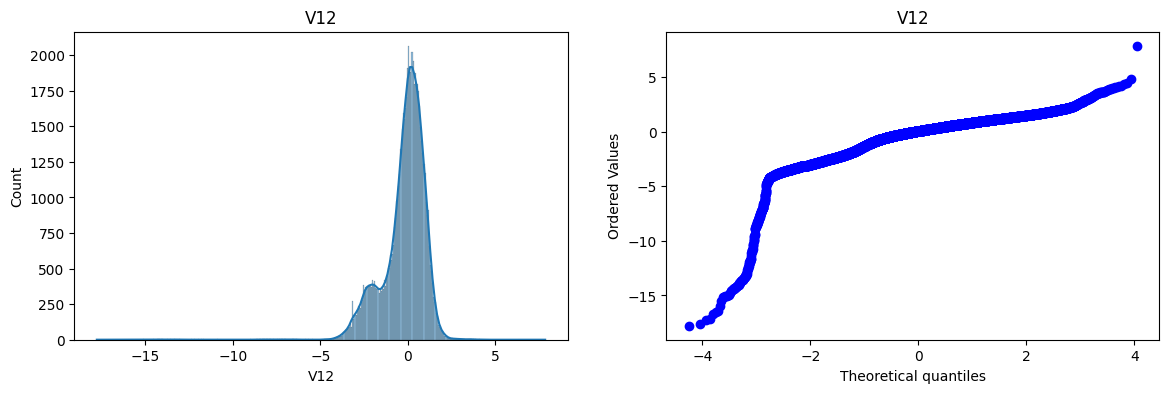

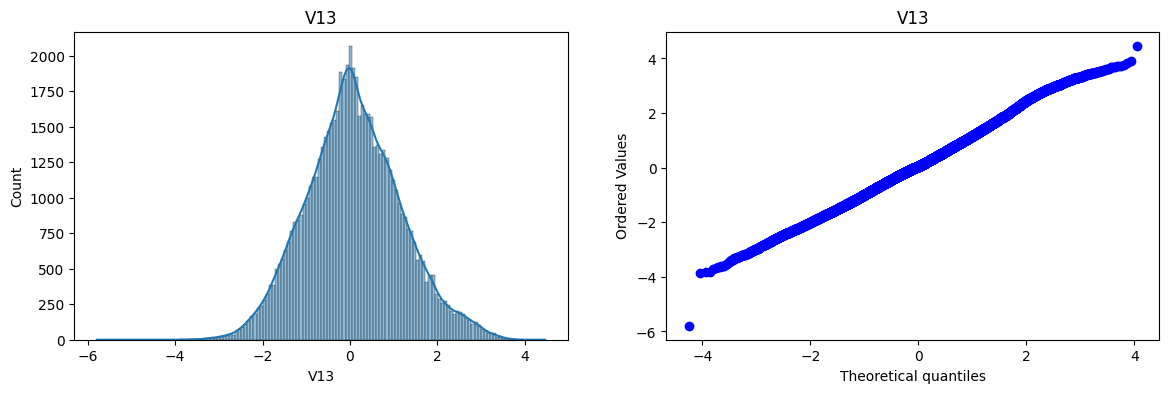

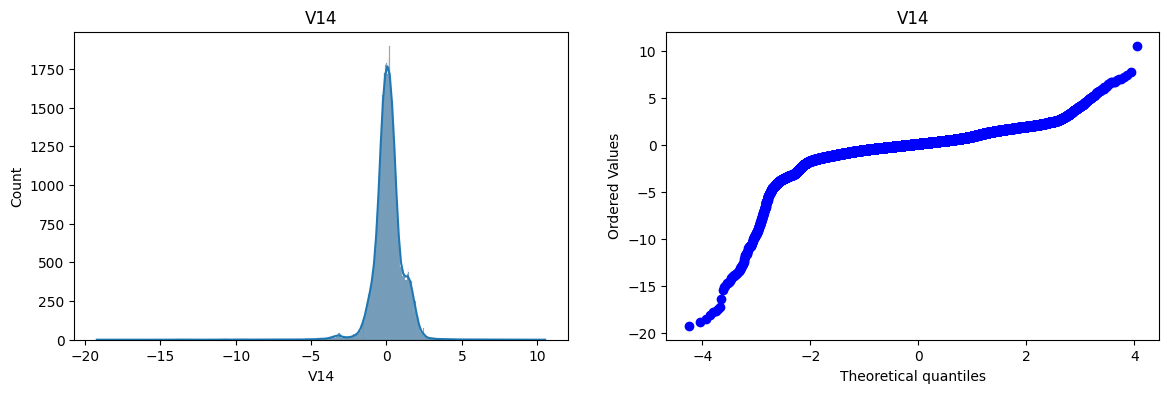

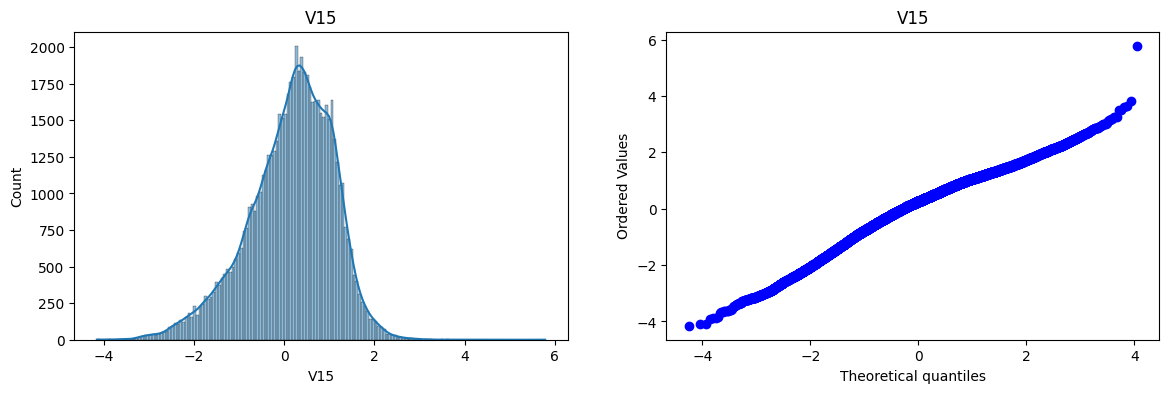

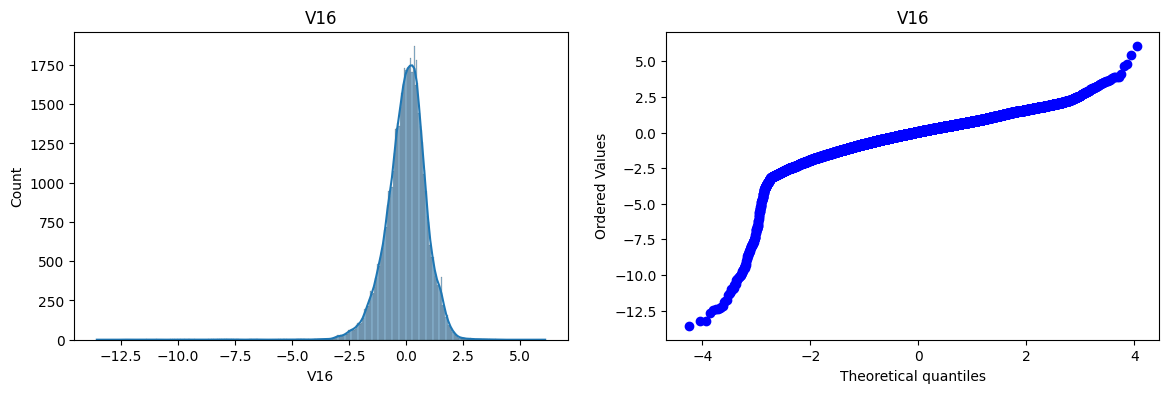

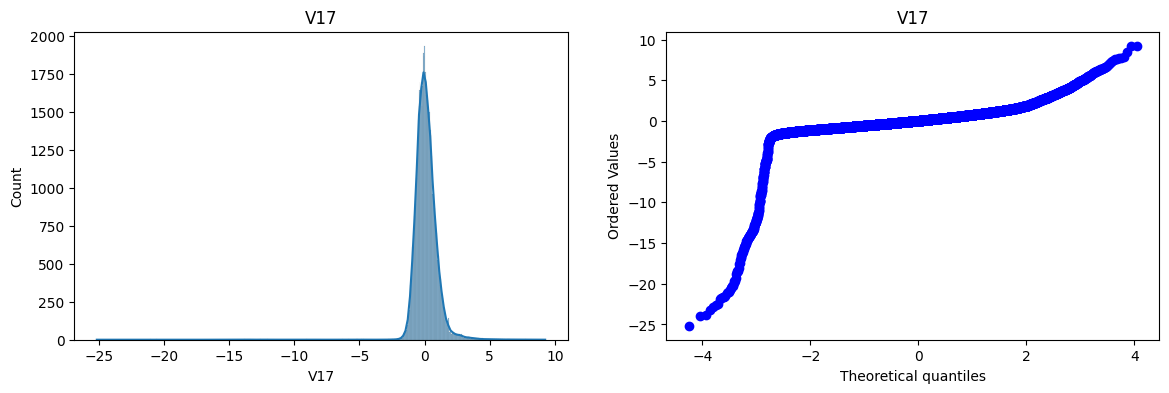

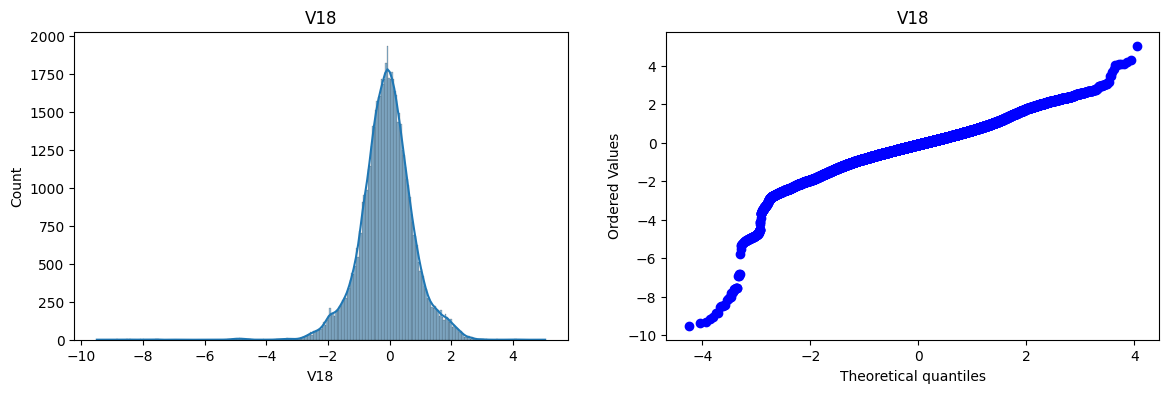

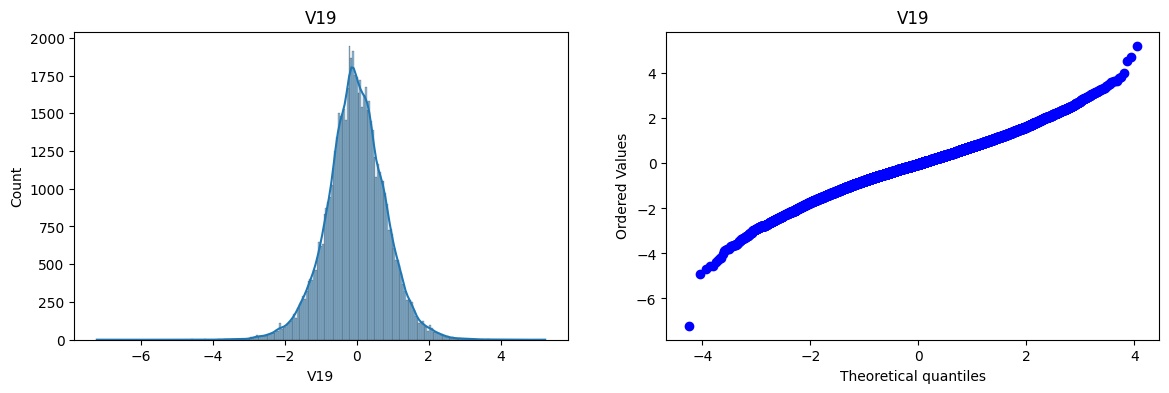

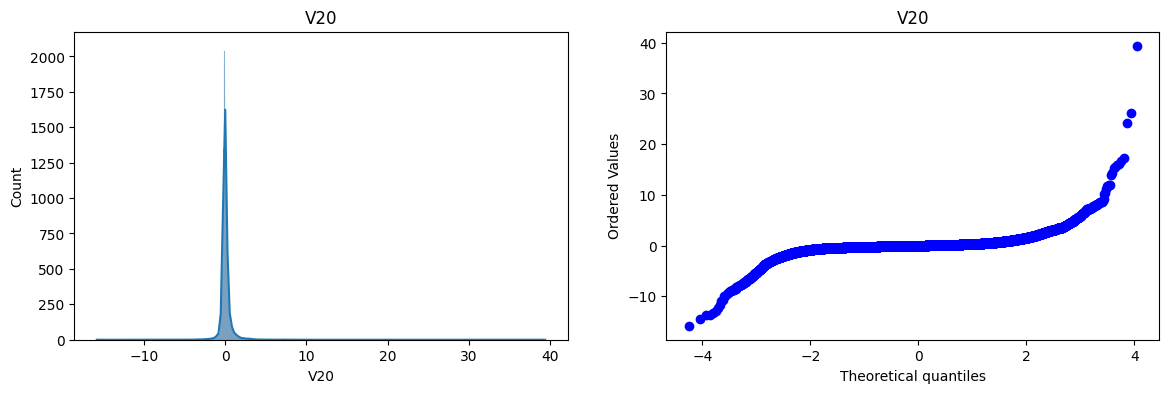

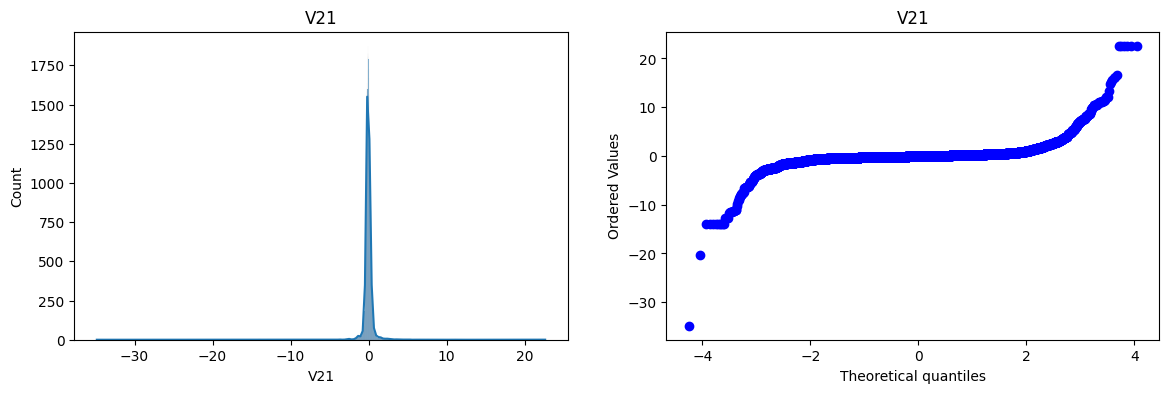

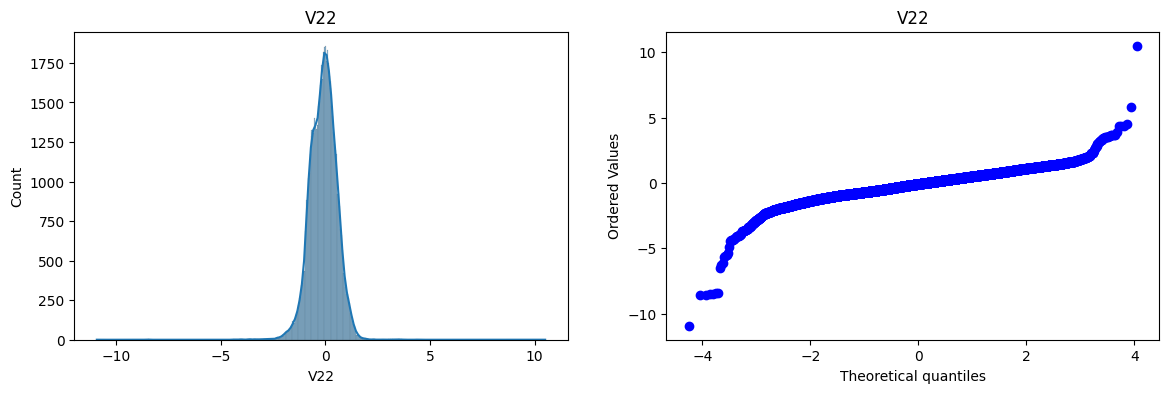

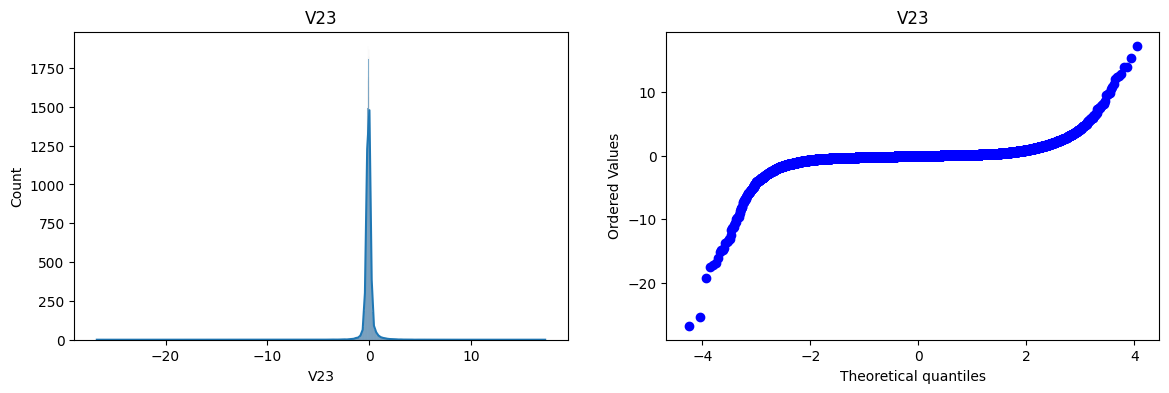

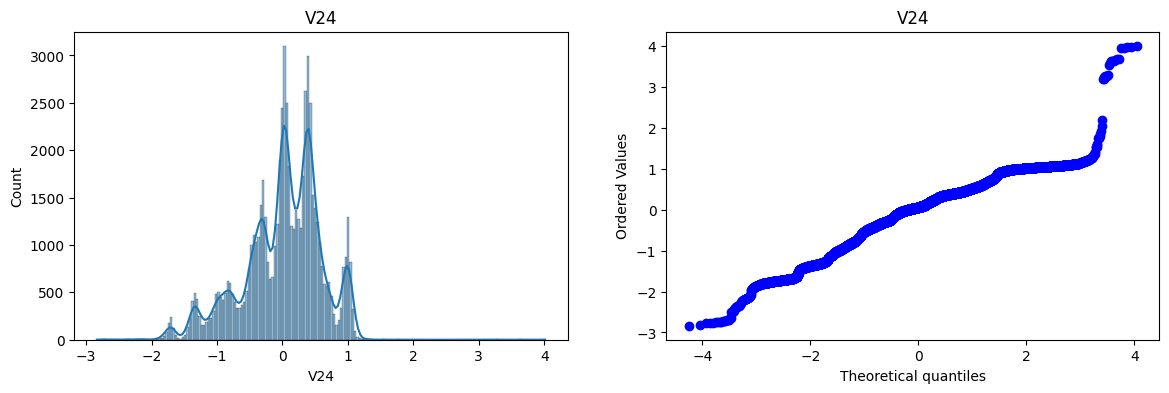

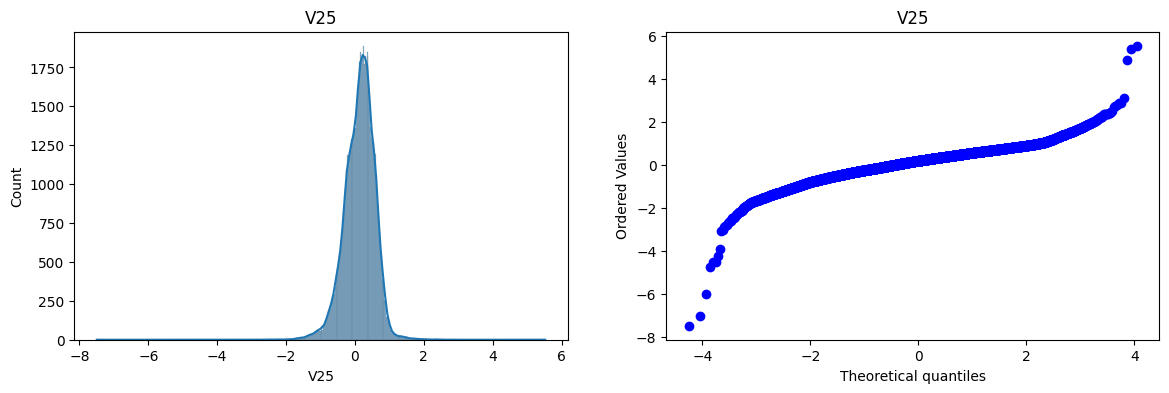

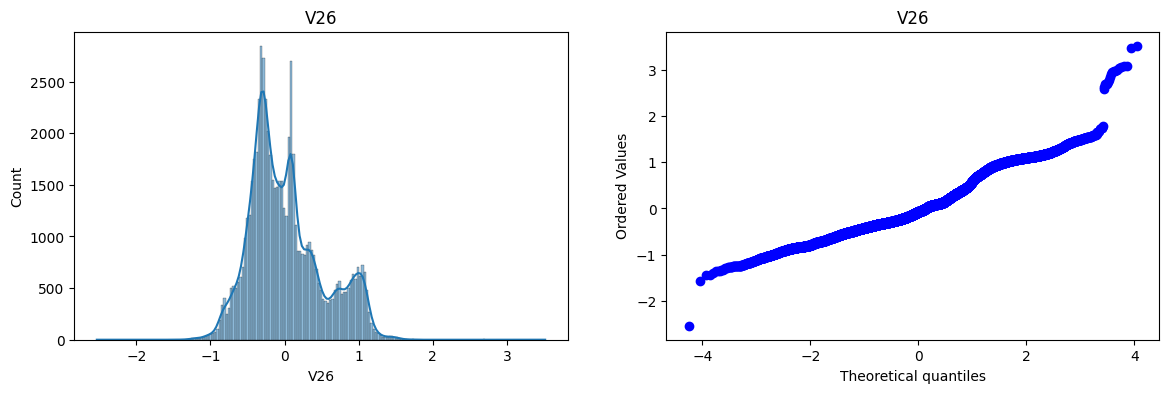

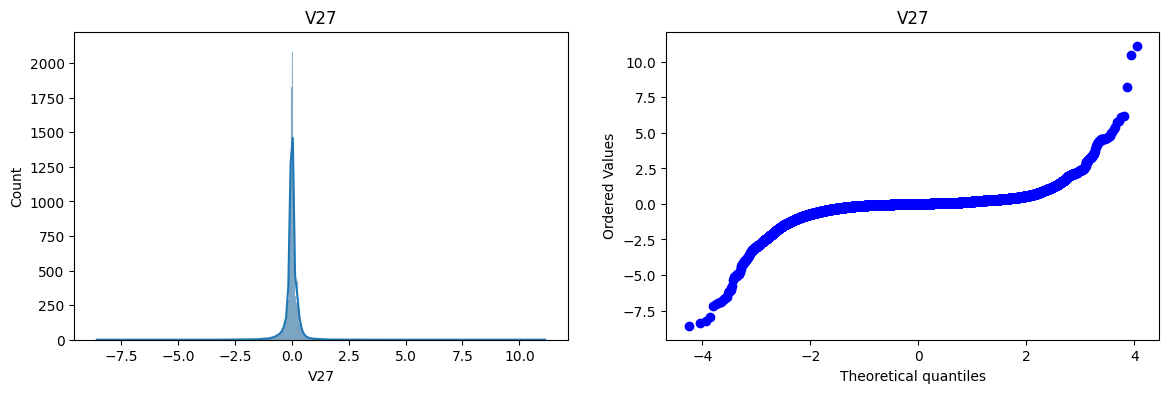

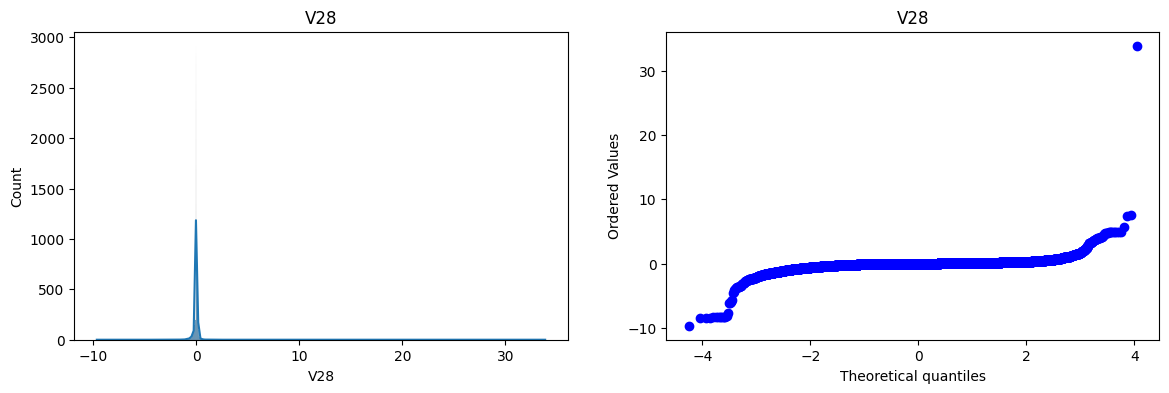

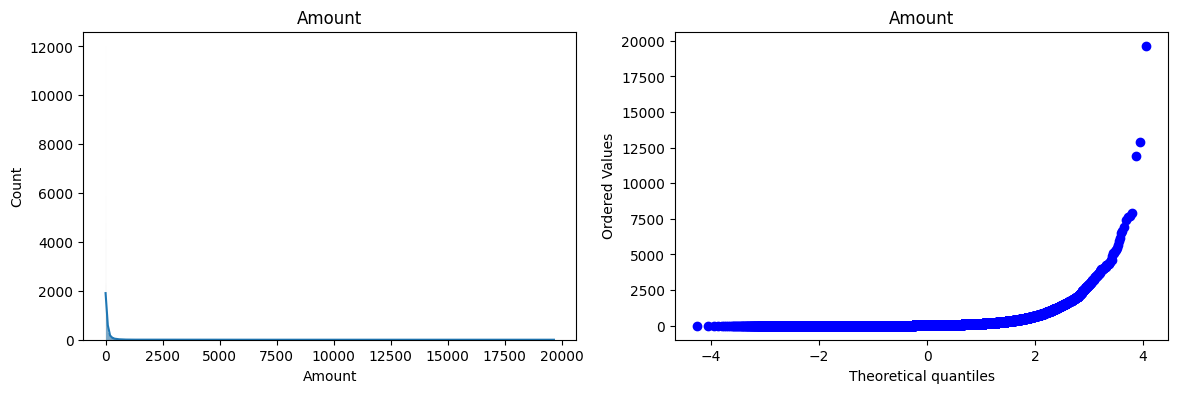

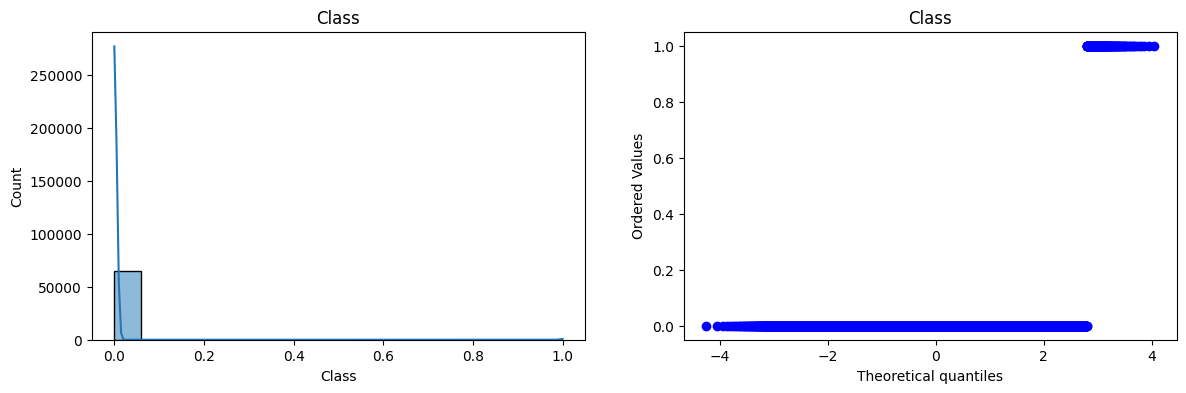

In [ ]:
x = df.drop(columns=['Time','V1','V2','V3','V4','V5','V6'], axis =1)
for  col in x:
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    sns.histplot(x[col],kde = True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(x[col] ,dist = 'norm',plot = plt)
    plt.title(col)

    plt.show()

**Bivariate analysis**

1. Amount vs Class (Boxplot)

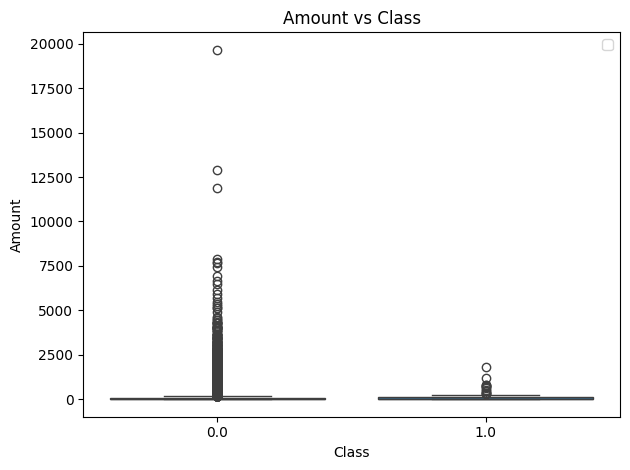

In [ ]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.title(f"Amount vs Class")

plt.legend()
plt.tight_layout()
plt.show()

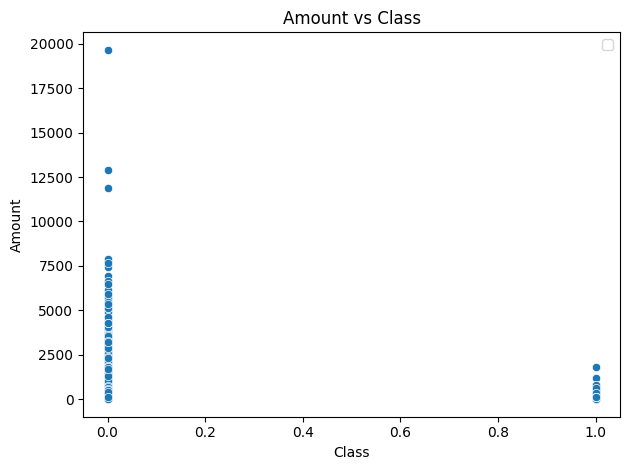

In [ ]:
sns.scatterplot(x='Class', y='Amount', data=df)
plt.title(f"Amount vs Class")

plt.legend()
plt.tight_layout()
plt.show()

2. Time vs Class (KDE plot)

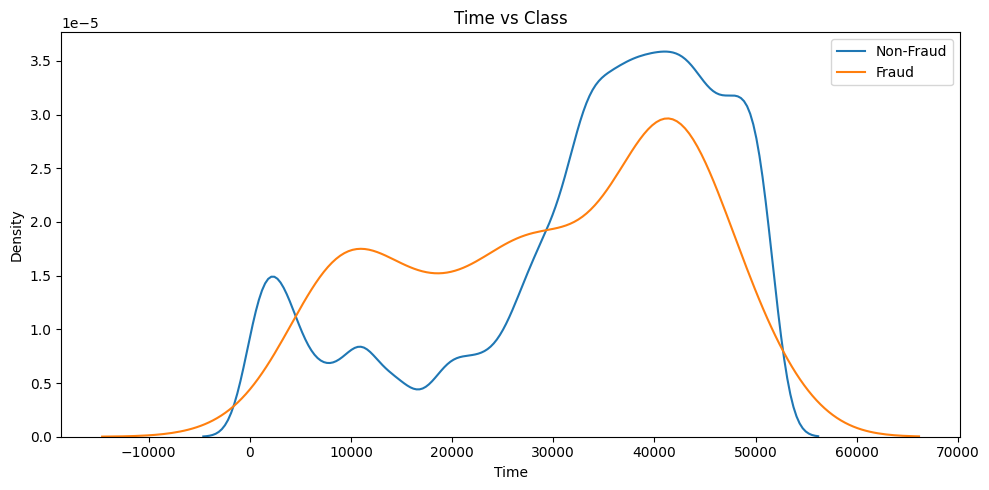

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(df[df['Class']==0]['Time'], label='Non-Fraud')
sns.kdeplot(df[df['Class']==1]['Time'], label='Fraud')
plt.legend()
plt.title(f"Time vs Class")

plt.legend()
plt.tight_layout()
plt.show()

3. V-features vs Class (Looping over V1–V28)

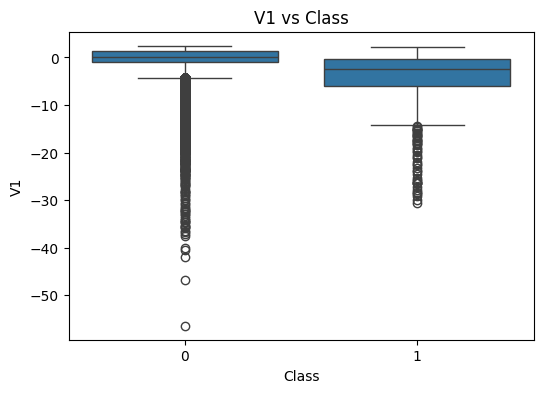

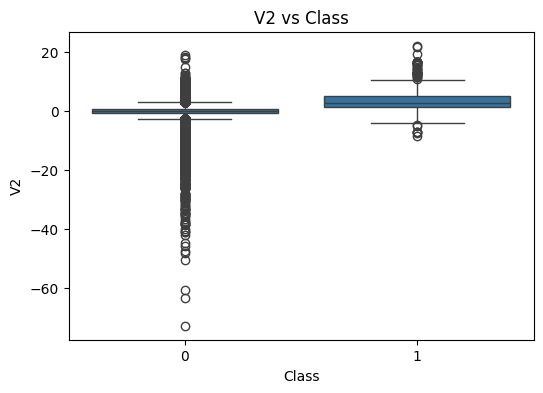

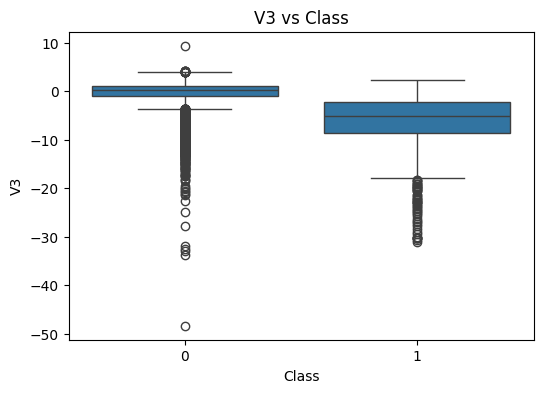

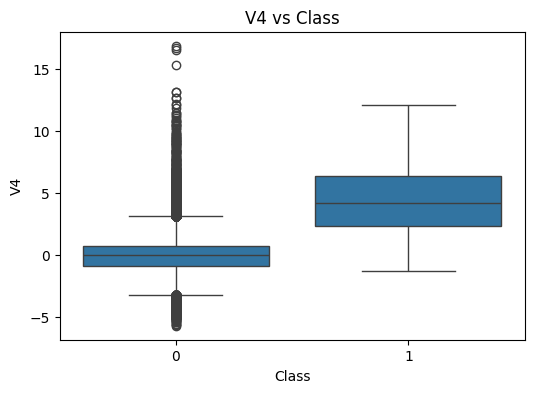

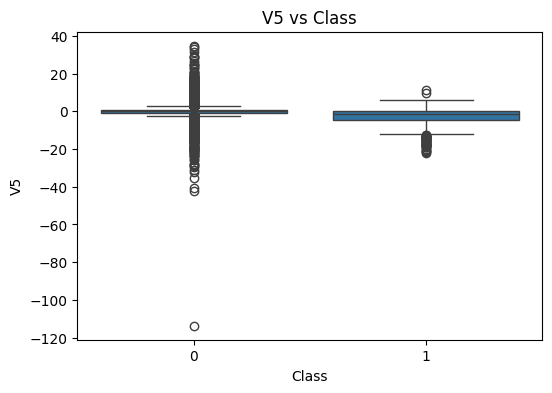

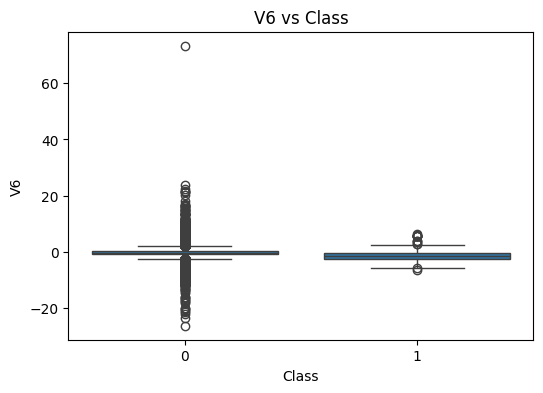

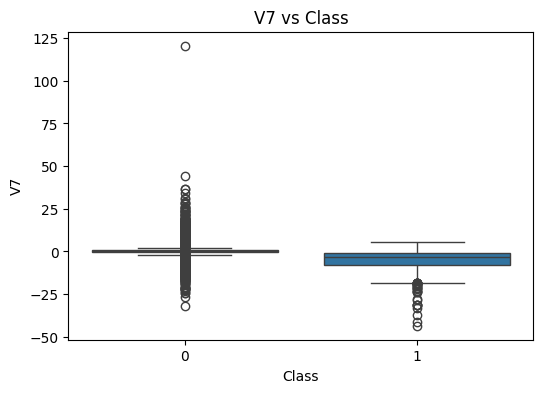

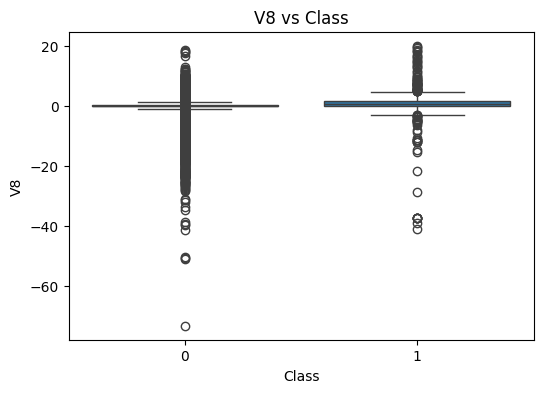

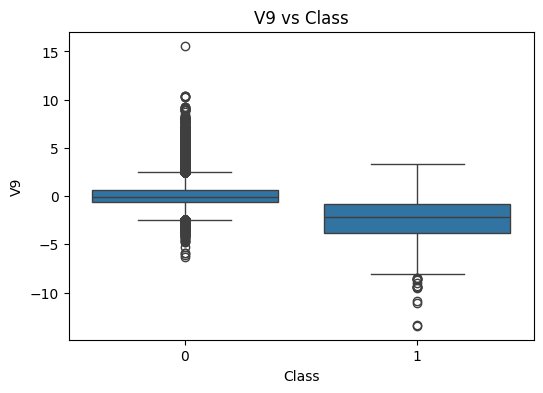

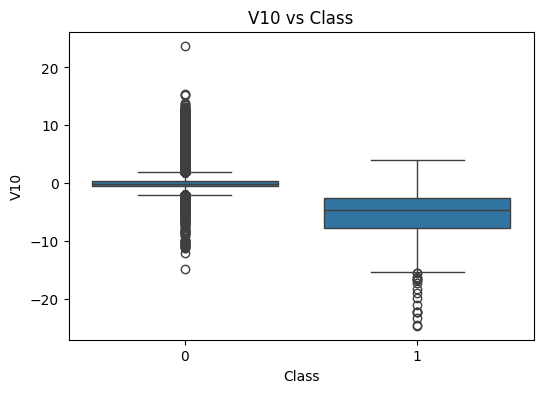

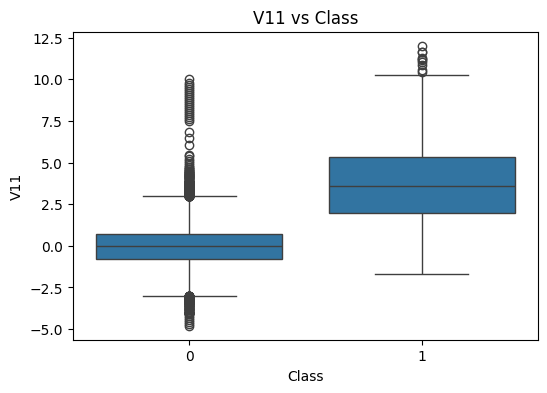

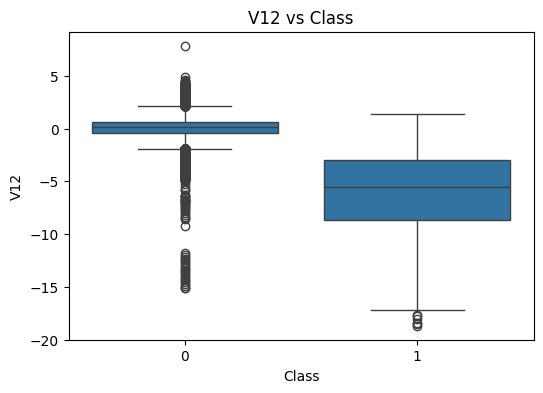

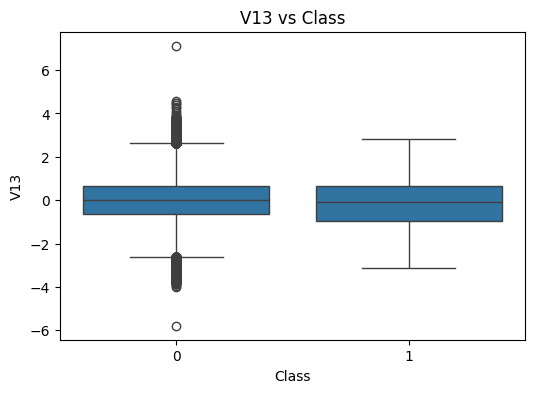

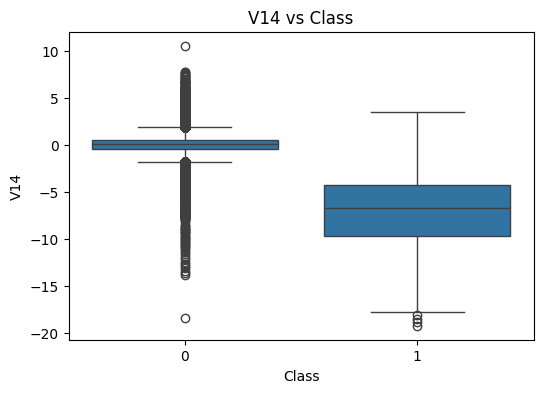

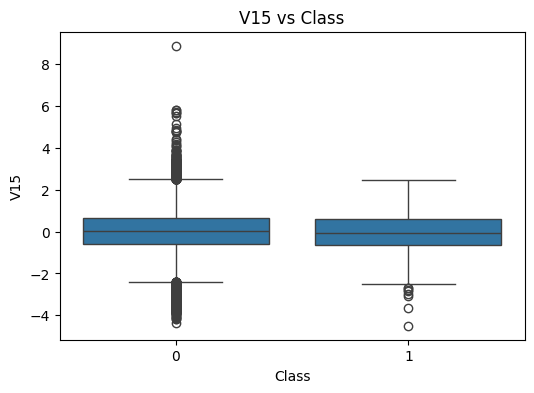

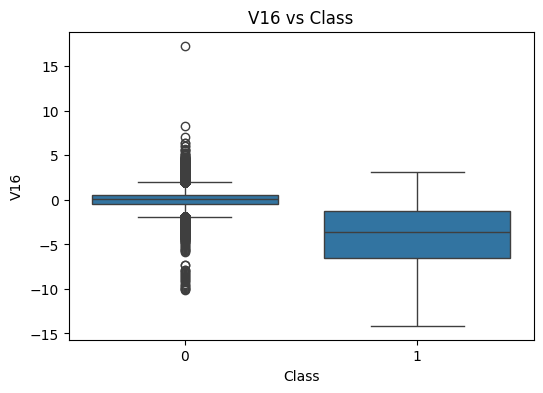

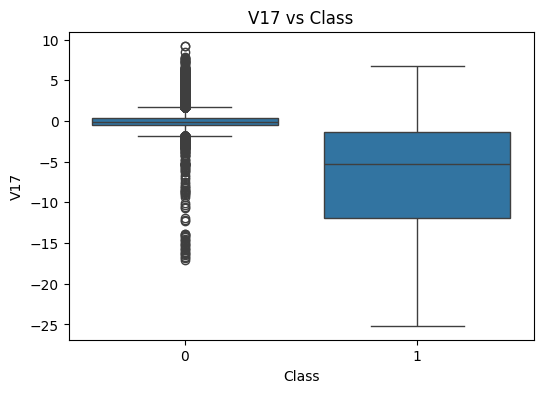

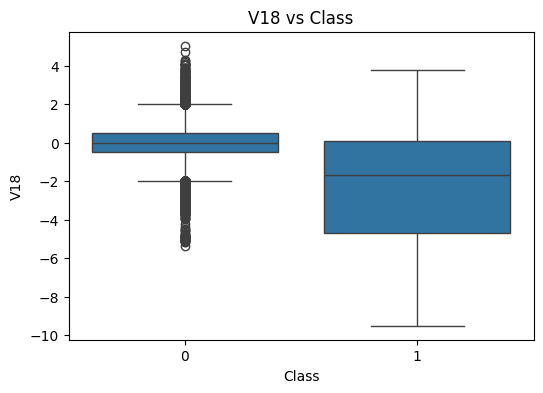

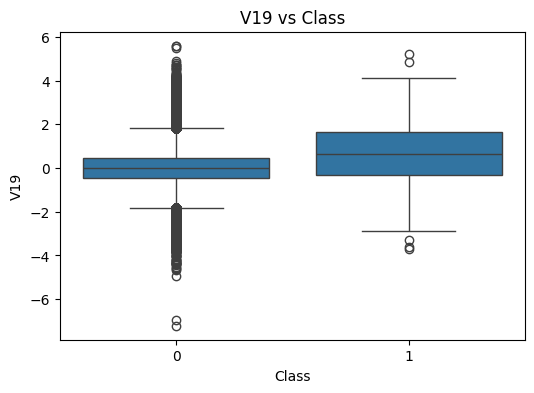

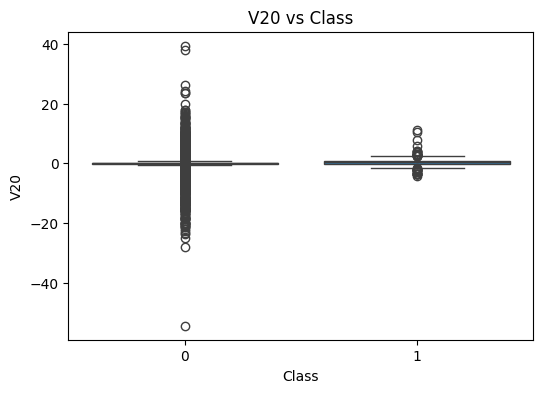

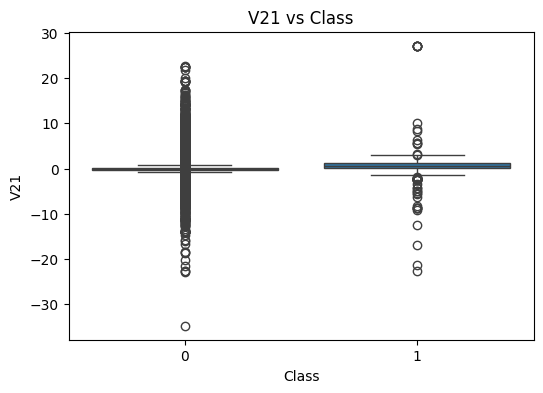

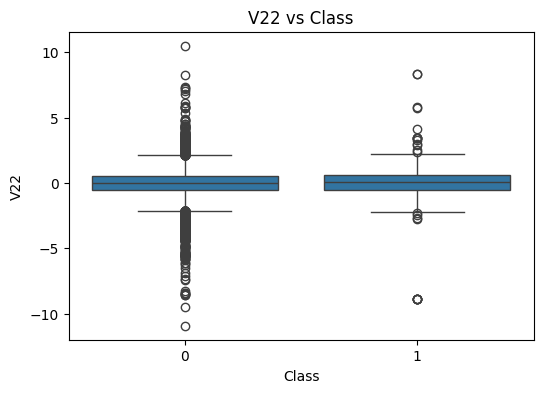

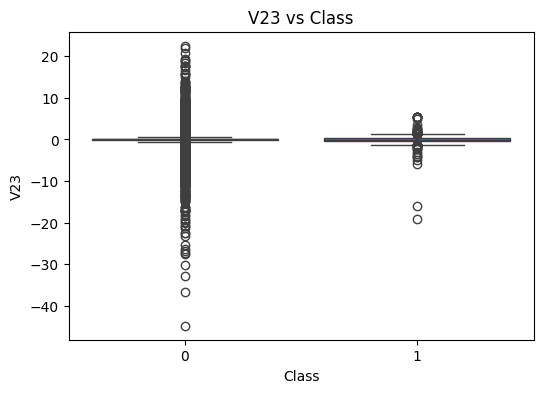

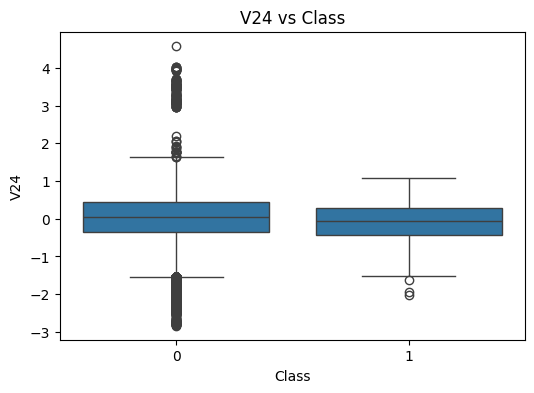

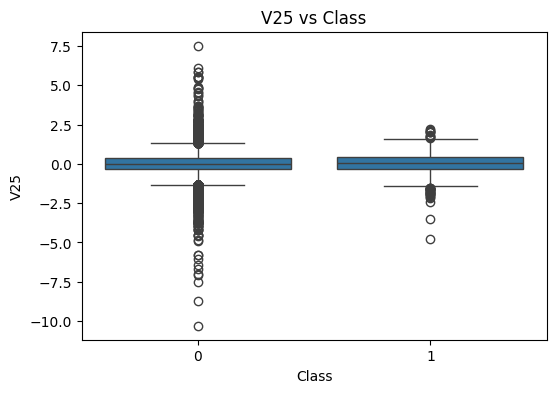

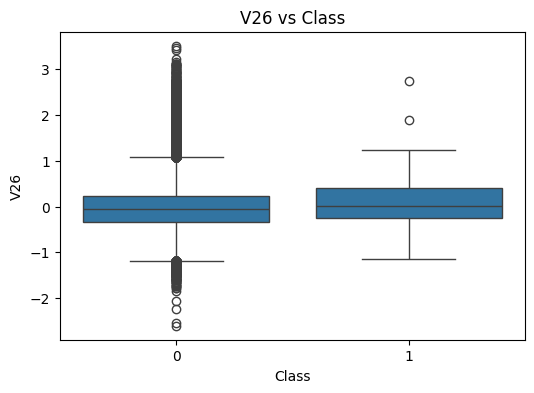

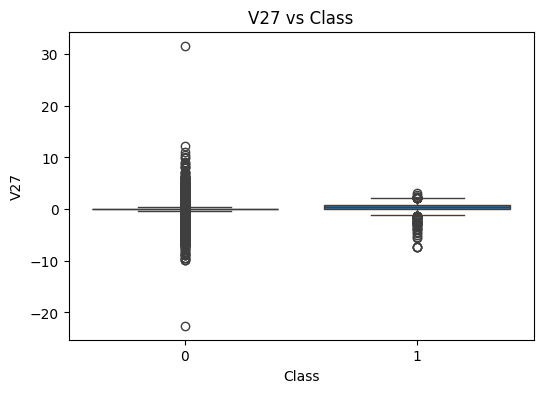

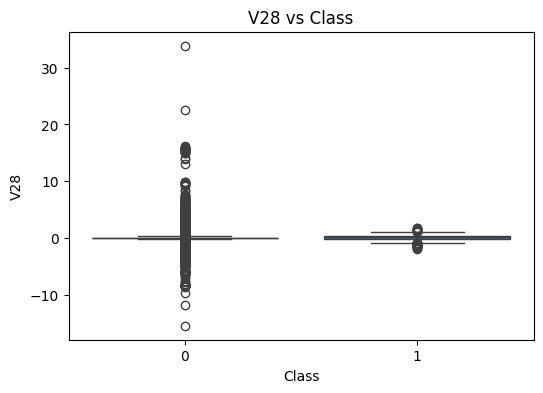

In [ ]:
for col in df.columns[1:29]:  # V1 to V28
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Class', y=col, data=df)
    plt.title(f'{col} vs Class')
    plt.show()

4. Scatter Plot: Amount vs Time (Colored by Class)

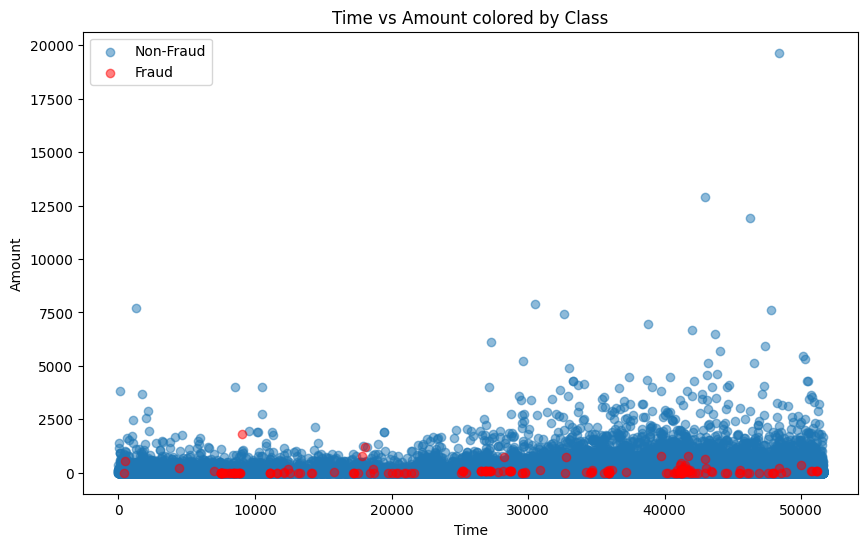

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df[df['Class']==0]['Time'], df[df['Class']==0]['Amount'], label='Non-Fraud', alpha=0.5)
plt.scatter(df[df['Class']==1]['Time'], df[df['Class']==1]['Amount'], label='Fraud', alpha=0.5, color='red')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Time vs Amount colored by Class')
plt.show()

**Data Preprocessing**

In [ ]:
# checking for the null values
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


**Observation**

 **columns [v9,v13,v15,v19] these feature normalilly distributed so we can replace these column with mean**

 **remaing columns distribution is not normal so we can replace with median**

In [ ]:
nor_data = df[['V13','V15','V19']]
unnor_data = df.drop(columns = ['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V13','V15','V19'])

# Step 2: Fill missing values
for i in nor_data:
    df[i].fillna(df[i].mean(), inplace=True)

for i in unnor_data:
    df[i].fillna(df[i].median(), inplace=True)

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


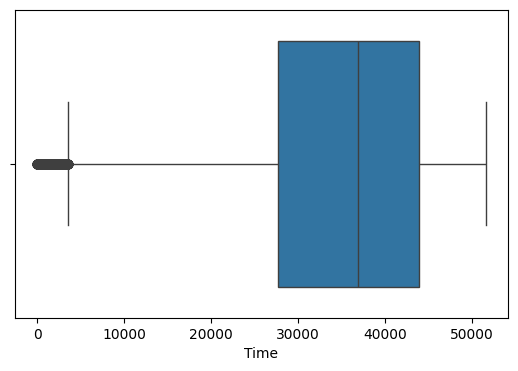

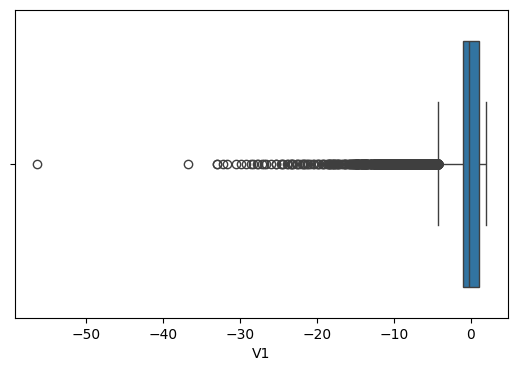

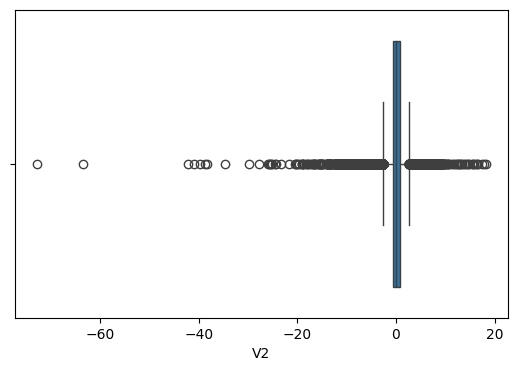

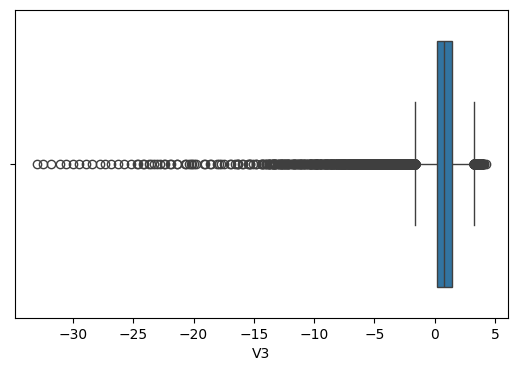

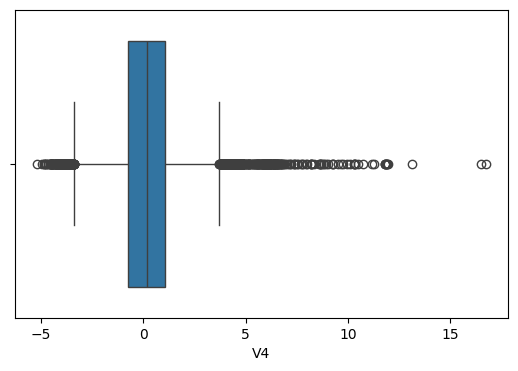

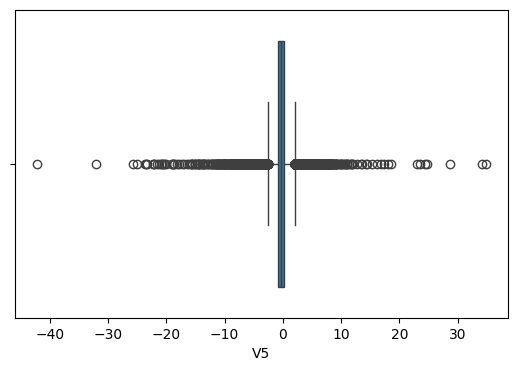

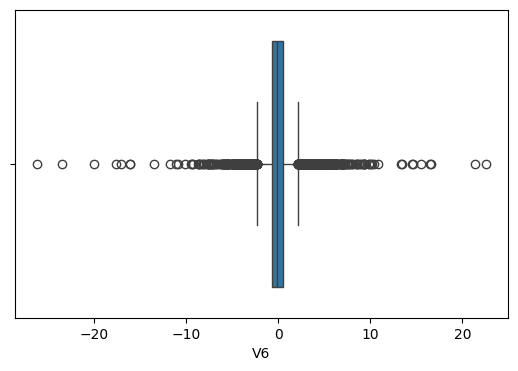

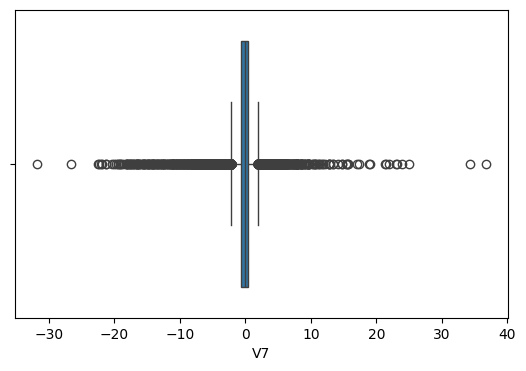

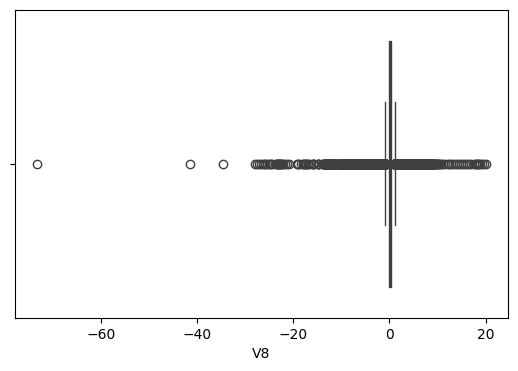

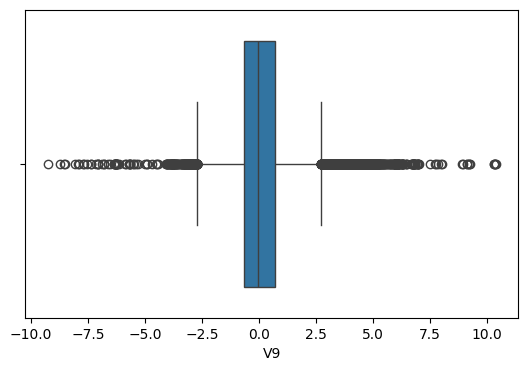

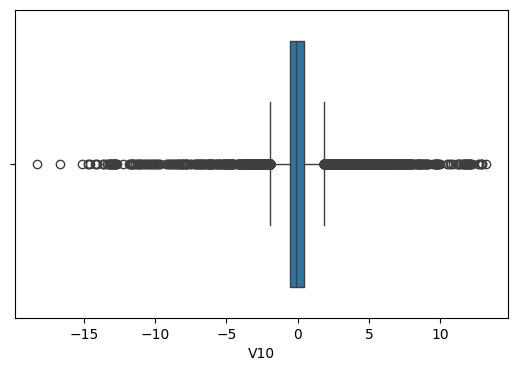

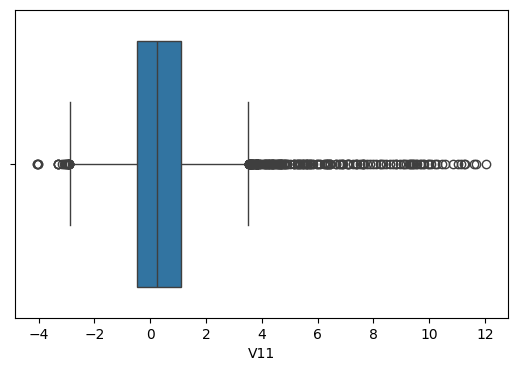

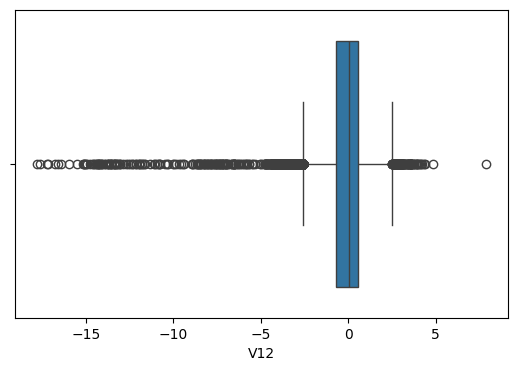

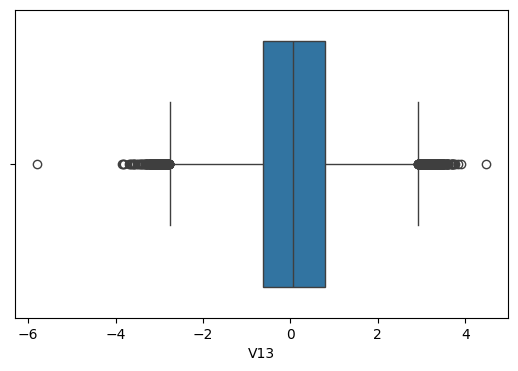

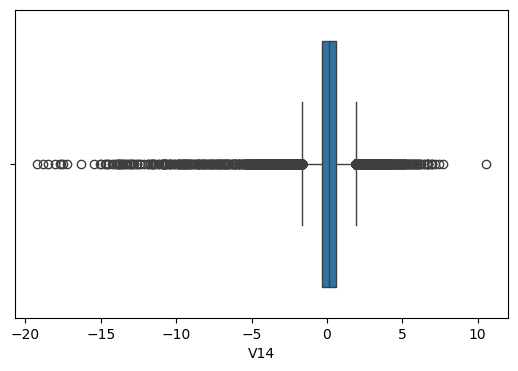

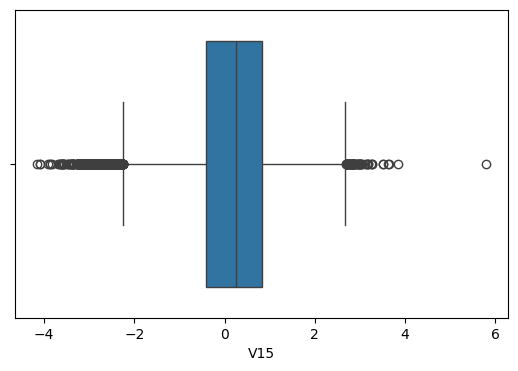

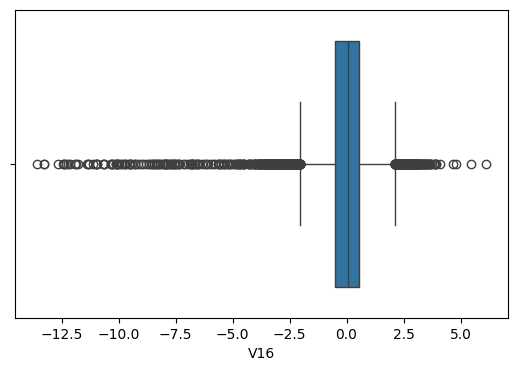

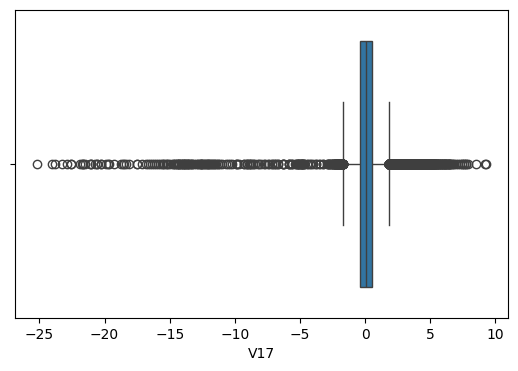

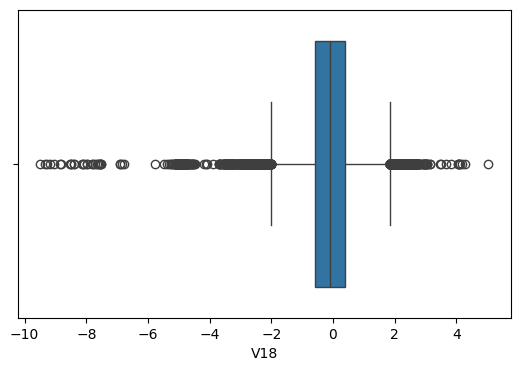

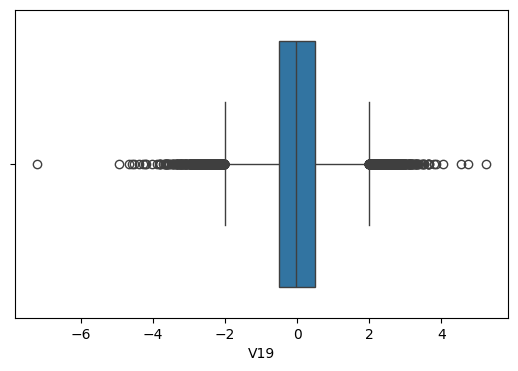

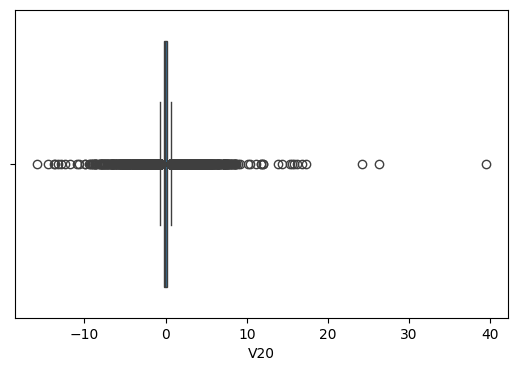

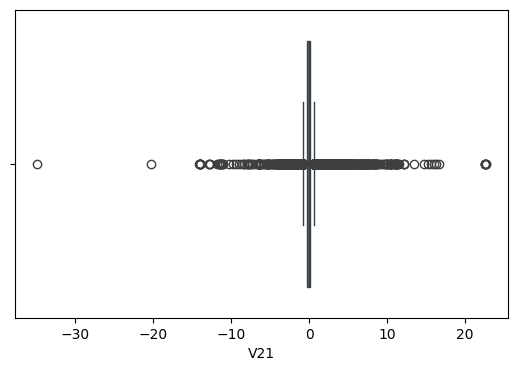

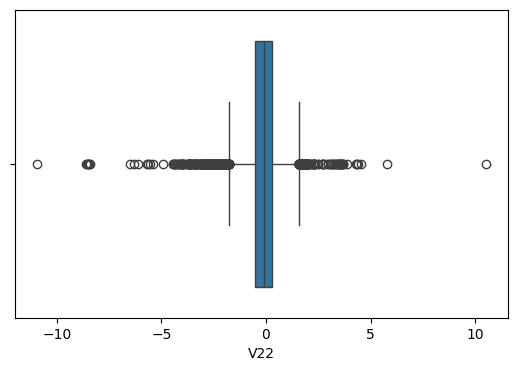

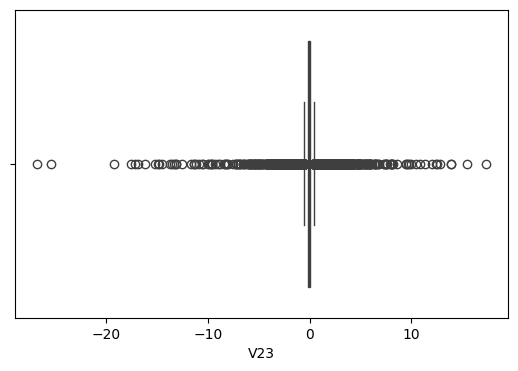

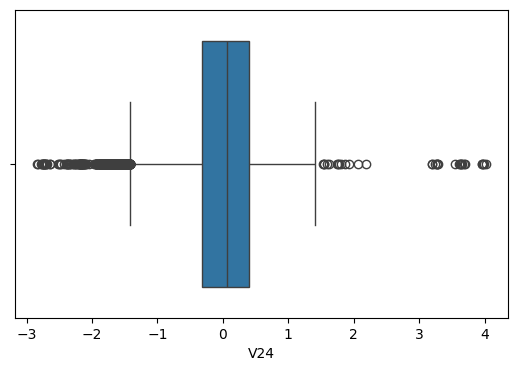

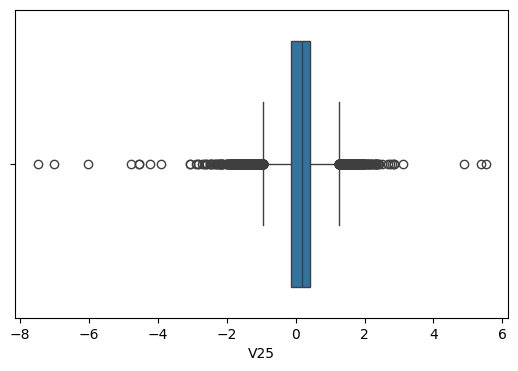

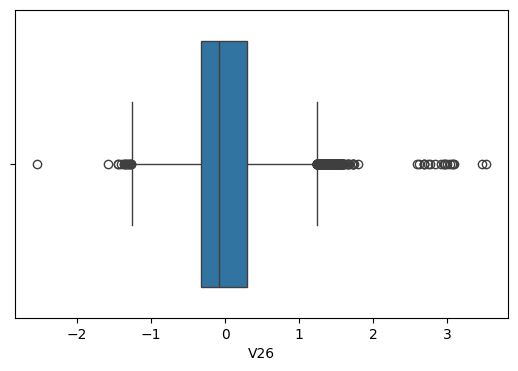

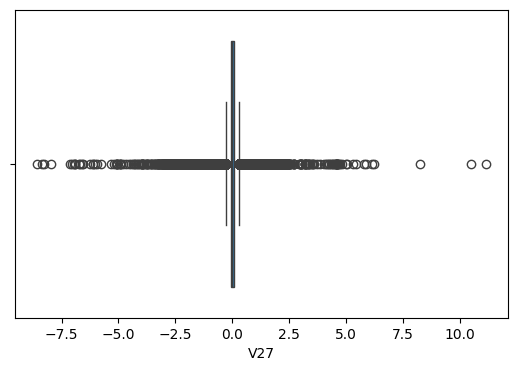

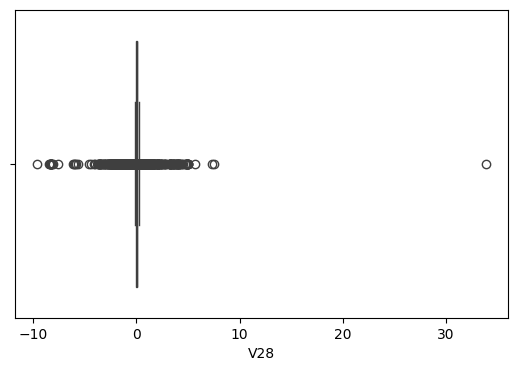

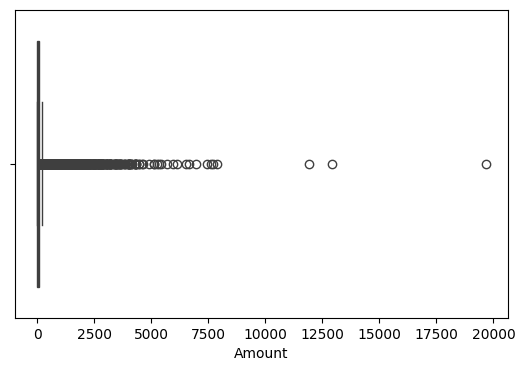

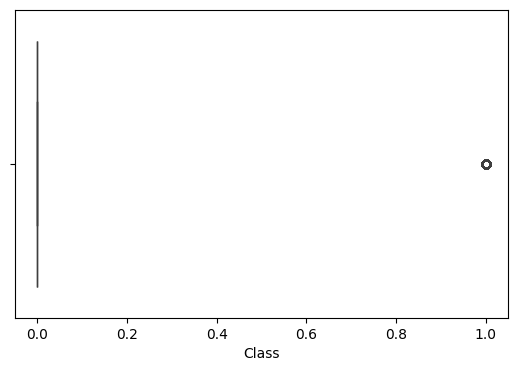

In [ ]:
# checking for the outliers
for i in df:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.boxplot(x=df[i])
    plt.xlabel(i)

**Obsevation**
###### PCA already reduces dimensionality and handles variance.

###### Replacing outliers might distort the transformed feature space.

###### These components don’t correspond to specific real-world features (they’re linear combinations).

In [ ]:
# applying the IQR technique to handle the outliers
IQR = stats.iqr(df.Time,interpolation='midpoint')
IQR

np.float64(16158.0)

In [ ]:
for col in ['Amount', 'Time']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    median = df[col].median()

    df[col] = df[col].apply(lambda x: median if x < lower or x > upper else x)


<Axes: xlabel='Time'>

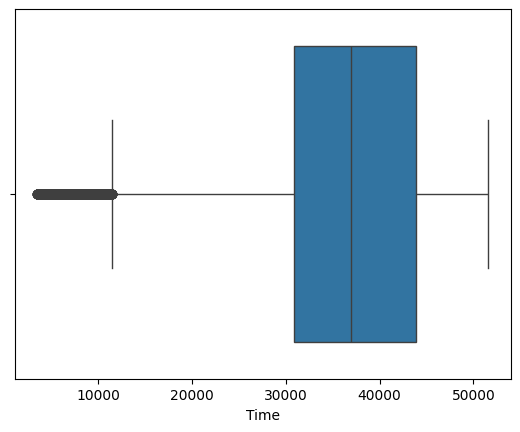

In [ ]:
sns.boxplot(x=df['Time'])

<Axes: xlabel='Time'>

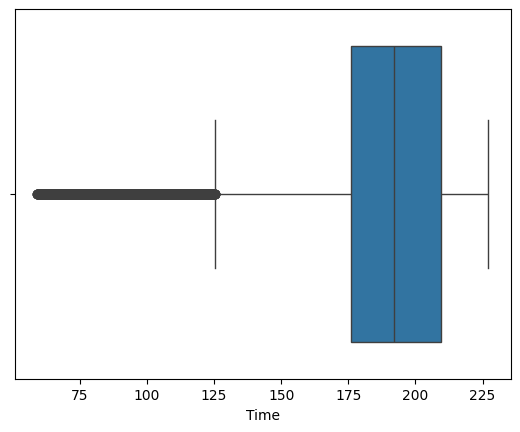

In [ ]:
df.Time = np.sqrt(df.Time)
sns.boxplot(x=df.Time)

<Axes: xlabel='Amount'>

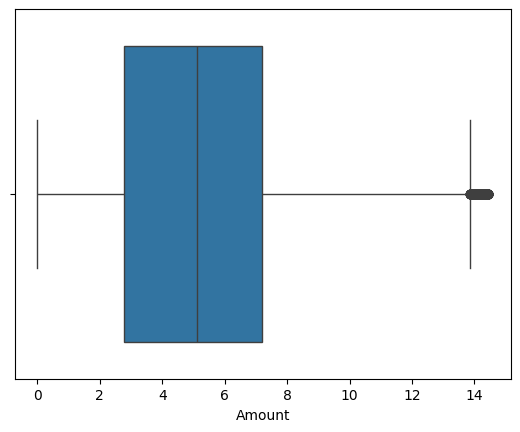

In [ ]:
sns.boxplot(x=df['Amount'])

In [ ]:
df.Amount= np.sqrt(df.Amount)

<Axes: xlabel='Amount'>

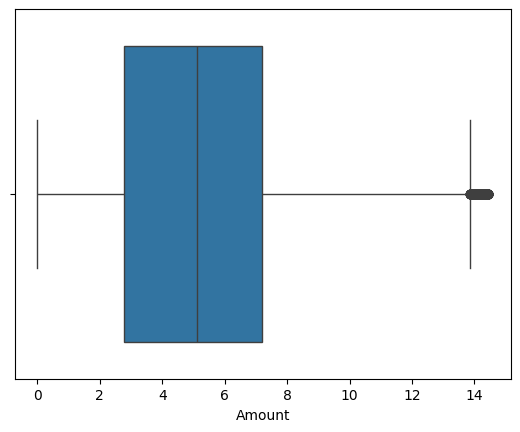

In [ ]:
sns.boxplot(x=df.Amount)

**no need of normalizing as the data itself is a pca transformed**

In [ ]:
# applying standardscaler to only amount and time for easy computation
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df['Time'] = scaler.fit_transform(df[['Time']])


In [ ]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.198279,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,2.070273,0.0
1,0.198279,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-1.080437,0.0
2,0.198279,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,-0.045126,0.0
3,0.198279,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.737446,0.0
4,0.198279,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.920289,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65448,1.148597,-0.248790,1.080973,-0.917017,-0.976831,3.234594,2.963384,0.673578,0.509785,-0.674202,-0.778828,0.348890,-0.743570,-0.265784,-1.497000,0.982542,0.676325,0.448773,0.852961,0.177488,0.172792,-0.160001,-0.482385,-0.326914,0.885378,0.220774,0.300600,-0.277872,-0.146796,-1.308993,0.0
65449,1.148597,1.130476,0.090195,0.358313,0.579876,-0.413699,-0.873547,0.192253,-0.105390,-0.005114,-0.117394,0.219510,0.108653,-0.750485,0.615284,1.251465,-0.127890,0.111707,-1.350507,-0.388250,-0.113271,-0.438925,-1.421174,0.310895,0.353704,-0.083121,-0.015829,-0.046818,0.021914,0.380032,0.0
65450,1.148657,1.298511,0.103767,0.026676,0.239810,0.066831,-0.021495,-0.125705,0.066416,-0.000780,0.130748,0.288647,0.202517,-0.449875,0.542012,0.513771,0.880929,-1.047265,0.442188,0.616167,-0.100681,-0.292495,-0.919318,-0.009714,-0.866837,0.313025,0.152421,-0.040222,-0.004856,-1.149746,0.0
65451,1.148717,-1.062891,0.242080,2.425183,1.125829,-1.284732,1.535764,-0.524604,1.074866,0.627453,-1.034628,0.153055,1.406010,-0.233288,-0.657781,-2.302404,-0.581819,0.518262,0.070173,0.241809,-0.006922,0.194731,0.719323,0.072734,0.042001,0.060638,-0.254387,0.012123,0.010512,1.602878,0.0


**using unsupervised learning aproach**

**anomaly detection**
####since data is imbalanced we will use model like (isolation Forest,one-class SVM)

In [ ]:
X = df.drop('Class',axis = 1)
Y_true= df['Class']

In [ ]:
Y_true.value_counts() # its imbalanced

,count
Class,
0.0,65284
1.0,169


**One-Class SVM**

In [ ]:
from sklearn.svm import OneClassSVM
ocsvm = OneClassSVM(kernel='rbf',nu=0.0017,gamma = 'auto')
ocsvm.fit(X)
Y_pred_ocsvm = ocsvm.predict(X)
Y_pred_ocsvm = [1 if x == -1 else 0 for x in Y_pred_ocsvm]

**Evaluation**

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(Y_true,Y_pred_ocsvm))
print(classification_report(Y_true,Y_pred_ocsvm))

[[64785   499]
 [  120    49]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     65284
         1.0       0.09      0.29      0.14       169

    accuracy                           0.99     65453
   macro avg       0.54      0.64      0.57     65453
weighted avg       1.00      0.99      0.99     65453



**Isolation Forest**

In [ ]:
from sklearn.ensemble import IsolationForest
isrf = IsolationForest(n_estimators=100,max_samples=len(X),contamination=0.0017,random_state=42,verbose=0)
isrf.fit(X)
Y_pred_isrf = isrf.predict(X)
Y_pred_isrf = [1 if x == -1 else 0 for x in Y_pred_isrf]

**Model Evaluation**

In [ ]:
print(confusion_matrix(Y_true,Y_pred_isrf))
print(classification_report(Y_true,Y_pred_isrf))

[[65234    50]
 [  107    62]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     65284
         1.0       0.55      0.37      0.44       169

    accuracy                           1.00     65453
   macro avg       0.78      0.68      0.72     65453
weighted avg       1.00      1.00      1.00     65453



**using smote balancing technique to imbalnced class**

In [ ]:
x = df.drop('Class',axis = 1)
y = df['Class']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_res ,y_train_res = SMOTE().fit_resample(x_train,y_train)
print(x_train_res.shape)
print(y_train_res.shape)

(104452, 30)
(104452,)


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(52362, 30)
(52362,)
(13091, 30)
(13091,)


In [ ]:
print(y_train.value_counts())
print(y_train_res.value_counts())

Class
0.0    52226
1.0      136
Name: count, dtype: int64
Class
0.0    52226
1.0    52226
Name: count, dtype: int64


**supurvised aproaches**

**Logistic Regression model**

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(class_weight='balanced')
lgr.fit(x_train_res,y_train_res)
y_pred_lgr = lgr.predict(x_test)

**Model Evaluation**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, average_precision_score,precision_score,recall_score
print('Precision Score:',precision_score(y_test,y_pred_lgr))
print('Recall Score:',recall_score(y_test,y_pred_lgr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgr))
print("ROC-AUC Score:", roc_auc_score(y_test, lgr.predict_proba(x_test)[:, 1]))
print("PR-AUC Score:", average_precision_score(y_test, lgr.predict_proba(x_test)[:, 1]))

Precision Score: 0.1111111111111111
Recall Score: 0.8787878787878788
Confusion Matrix:
 [[12826   232]
 [    4    29]]
ROC-AUC Score: 0.9651554602542503
PR-AUC Score: 0.7560400020357961


**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier( n_estimators=100,class_weight='balanced')
rf.fit(x_train_res,y_train_res)
y_pred_rf = rf.predict(x_test)

**model Evaluation**

In [ ]:
print('Precision Score:',precision_score(y_test,y_pred_rf))
print('Recall Score:',recall_score(y_test,y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, rf.predict_proba(x_test)[:, 1]))
print("PR-AUC Score:", average_precision_score(y_test, rf.predict_proba(x_test)[:, 1]))

Precision Score: 0.9642857142857143
Recall Score: 0.8181818181818182
Confusion Matrix:
 [[13057     1]
 [    6    27]]
ROC-AUC Score: 0.9822215105566308
PR-AUC Score: 0.8874994052251118


**XGBOOST**

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=500,random_state=42,max_depth=10,learning_rate=0.05)

xgb_model.fit(x_train_res, y_train_res)
y_pred_xgb = xgb_model.predict(x_test)

**Model Evaluation**

In [ ]:
print('Precision Score:',precision_score(y_test,y_pred_xgb))
print('Recall Score:',recall_score(y_test,y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, xgb_model.predict_proba(x_test)[:, 1]))
print("PR-AUC Score:", average_precision_score(y_test, xgb_model.predict_proba(x_test)[:, 1]))

Precision Score: 0.9655172413793104
Recall Score: 0.8484848484848485
Confusion Matrix:
 [[13057     1]
 [    5    28]]
ROC-AUC Score: 0.9788078363664212
PR-AUC Score: 0.8737434681400372
